In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import nan
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
input_file = 'most-recent-cohorts-all-data-elements-1.csv'
path = './data/'
column_template_2 = 'column_heading_template_earnings.csv'
path2 = './data_documentation/'
input_file_for_earnings = 'clean_earnings_df.csv'

In [3]:
column_headings_template_df = pd.read_csv(path2 +column_template_2)
column_headings_template_df

dev-category                               NAME OF DATA ELEMENT  \
0      academics  Bachelor's degree in Agriculture, Agriculture ...   
1      academics  Bachelor's degree in Architecture And Related ...   
2      academics  Bachelor's degree in Area, Ethnic, Cultural, G...   
3      academics  Bachelor's degree in Biological And Biomedical...   
4      academics  Bachelor's degree in Business, Management, Mar...   
..           ...                                                ...   
235      student                      Poverty rate, via Census data   
236      student                        Share of dependent students   
237      student                           Share of female students   
238      student                 Share of first-generation students   
239      student                          Share of married students   

                      developer-friendly name API data type VARIABLE NAME  
0               program.bachelors.agriculture       integer    CIP01BACHL  
1              program.bachelors.architecture       integer    CIP04BACHL  
2    program.bachelors.ethnic_cultural_gender       integer    CIP05BACHL  
3                program.bachelors.biological       integer    CIP26BACHL  
4        program.bachelors.business_marketing       integer    CIP52BACHL  
..                                        ...           ...           ...  
235                 demographics.poverty_rate         float  POVERTY_RATE  
236                    demographics.dependent         float     DEPENDENT  
237                 demographics.female_share         float        FEMALE  
238             demographics.first_generation         float     FIRST_GEN  
239                      demographics.married         float       MARRIED  

[240 rows x 5 columns]

In [4]:
column_headings_for_earnings_summary = column_headings_template_df['VARIABLE NAME'].to_list()
column_heading_df = column_headings_template_df
column_headings_for_earnings_summary

['CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'PRGMOFR',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54',
 'PCIP43',
 'PCIP22',
 'PCIP24',
 'PCIP25',
 'PCIP27',
 'PCIP47',
 'PCIP29',
 'PCIP30',
 'PCIP03',
 'PCIP31',
 'PCIP12',
 'PCIP38',
 'PCIP40',
 'PCIP48',
 'PCIP42',
 'PCIP44',
 'PCIP41',
 'PCIP45',
 'PCIP39',
 'PCIP49',
 'PCIP50',


In [5]:
#this input file is ready to go.
filtered_4_year_df = pd.read_csv(path2 + input_file_for_earnings, index_col = 0)
filtered_4_year_df = filtered_4_year_df.fillna(0)

In [6]:
#here is where we apply the columns to filter the dataframe.
filtered_4_year_df = filtered_4_year_df[column_headings_for_earnings_summary]

In [7]:
filtered_4_year_df

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
0              1           1           0           1           2           0   
1              0           0           1           1           2           1   
2              0           0           0           0           2           0   
3              0           0           0           1           1           1   
4              0           0           0           1           1           1   
...          ...         ...         ...         ...         ...         ...   
5911           0           0           0           0           1           1   
5912           0           0           0           0           1           0   
5914           0           0           0           0           0           0   
5918           0           0           0           1           1           1   
5931           0           0           0           0           0           0   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  PCT_HISPANIC  \
0              1           1           0           1  ...          3.79   
1              0           1           0           1  ...          2.03   
2              0           0           0           0  ...          6.94   
3              0           1           0           1  ...          2.55   
4              0           1           0           1  ...          4.09   
...          ...         ...         ...         ...  ...           ...   
5911           0           1           0           0  ...          0.00   
5912           0           1           0           0  ...          0.00   
5914           0           0           0           0  ...          0.00   
5918           0           1           0           0  ...          0.00   
5931           0           0           0           0  ...          0.00   

      PCT_WHITE  PCT_BORN_US  PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
0     46.840000    94.739998   13.00   0.0758     14.880000   0.901130   
1     69.019997    96.500000   15.93   0.2296     10.910000   0.678591   
2     70.879997    94.089996   13.23   0.8302     10.650000   0.104730   
3     76.379997    95.269997   17.67   0.1842      9.370000   0.748430   
4     42.689999    94.529999   11.81   0.0848     16.959999   0.892572   
...         ...          ...     ...      ...           ...        ...   
5911   0.000000     0.000000    0.00   0.9634      0.000000   0.081275   
5912   0.000000     0.000000    0.00   0.9291      0.000000   0.081275   
5914   0.000000     0.000000    0.00   0.4764      0.000000   0.544399   
5918   0.000000     0.000000    0.00   0.4652      0.000000   0.364462   
5931   0.000000     0.000000    0.00   0.6026      0.000000   0.336575   

        FEMALE  FIRST_GEN   MARRIED  
0     0.564030   0.365828  0.009102  
1     0.639091   0.341224  0.105087  
2     0.648649   0.512500  0.236486  
3     0.476350   0.310132  0.100460  
4     0.613419   0.343434  0.007987  
...        ...        ...       ...  
5911  0.697281   0.543534  0.284437  
5912  0.697281   0.543534  0.284437  
5914  0.679629   0.686430  0.081834  
5918  0.733679   0.578134  0.177259  
5931  0.797790   0.397344  0.213039  

[1826 rows x 240 columns]

In [8]:
filtered_4_year_df['MN_EARN_WNE_P6']

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: int64

In [9]:
#value for y is mean earning 6 years from enrollment
y = filtered_4_year_df['MN_EARN_WNE_P6']
y_baseline = y

In [10]:
y

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: int64

In [11]:
#get list of remaining columns to determine which ones still contain some text
column_list = filtered_4_year_df.columns.to_list()

In [12]:
column_list

['CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'PRGMOFR',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54',
 'PCIP43',
 'PCIP22',
 'PCIP24',
 'PCIP25',
 'PCIP27',
 'PCIP47',
 'PCIP29',
 'PCIP30',
 'PCIP03',
 'PCIP31',
 'PCIP12',
 'PCIP38',
 'PCIP40',
 'PCIP48',
 'PCIP42',
 'PCIP44',
 'PCIP41',
 'PCIP45',
 'PCIP39',
 'PCIP49',
 'PCIP50',


In [13]:
len(column_list)

240

In [14]:
#filtered_4_year_df.replace(to_replace = 'Dental Hygiene/Hygienist', value = 0, inplace = True)

In [15]:
X = filtered_4_year_df.fillna(0)
filtered_4_year_df = filtered_4_year_df.drop(columns = 'MN_EARN_WNE_P6')
X = filtered_4_year_df
X_base_line = X

In [16]:
print(X.shape, y.shape)

(1826, 239) (1826,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# random forest generator classifier
from sklearn.ensemble import RandomForestRegressor


In [19]:
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8197719189719097

In [20]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([3.39926303e-05, 1.31975328e-04, 7.22722437e-05, 2.88969212e-04,
       8.33304519e-04, 3.03232598e-04, 2.75071315e-05, 3.91276713e-04,
       3.78413259e-09, 5.28677024e-04, 3.23834155e-04, 1.87658502e-04,
       3.30364142e-04, 1.07753294e-04, 7.24494637e-05, 1.75113046e-03,
       2.02143308e-04, 4.26521252e-04, 7.32056415e-05, 3.41534225e-04,
       7.11775263e-06, 2.50885649e-04, 4.56101846e-06, 9.49676264e-05,
       3.08985912e-04, 1.32153205e-04, 9.01154998e-05, 1.03831101e-05,
       1.15915794e-04, 1.25355322e-04, 1.27943142e-08, 5.28806141e-04,
       2.40113403e-04, 1.04582899e-05, 5.03351132e-04, 1.08671853e-04,
       4.03482382e-04, 1.35352754e-03, 0.00000000e+00, 1.78469522e-04,
       3.01571267e-04, 8.01732993e-04, 3.85168837e-03, 6.69786897e-03,
       2.06510729e-03, 1.69286341e-04, 7.39181397e-03, 3.31152391e-07,
       4.62811531e-03, 1.48048513e-03, 2.28448753e-02, 2.31760897e-03,
       2.12481210e-04, 8.77143079e-04, 4.43992329e-02, 1.23450602e-03,
      

In [21]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, column_list), reverse=True)

[(0.2798737379482161, 'WDRAW_ORIG_YR2_RT'),
 (0.10036964492810382, 'AGE_ENTRY'),
 (0.07811835529599026, 'MN_EARN_WNE_P6'),
 (0.05317919798270031, 'LOCALE'),
 (0.05309603312041008, 'WOMENONLY'),
 (0.044399232914760944, 'PCIP51'),
 (0.033113068278319883, 'PCIP50'),
 (0.02284487529670489, 'PCIP14'),
 (0.011089038146074976, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.010372249470286289, 'INC_PCT_M1'),
 (0.009785278661580667, 'FIRST_GEN'),
 (0.009234972108748072, 'DEP_COMP_ORIG_YR6_RT'),
 (0.008508032591844931, 'REGION'),
 (0.0078413559675601, 'DEPENDENT'),
 (0.007391813970660956, 'PCIP11'),
 (0.0071459780366697765, 'PCIP49'),
 (0.0071020408478782646, 'FEMALE'),
 (0.007094532285805627, 'UG'),
 (0.006901808624980926, 'INC_PCT_H1'),
 (0.006697868974066872, 'PCIP52'),
 (0.006584694059842698, 'LOAN_EVER'),
 (0.0064882744110314645, 'INC_PCT_H2'),
 (0.006454180732619677, 'PCT_GRAD_PROF'),
 (0.00633551380813541, 'INC_PCT_M2'),
 (0.006335216376128537, 'FAMINC_IND'),
 (0.006304955455466914, 'POVERTY_RATE'),
 (

In [22]:
#X['IND_RPY_1YR_RT']

In [23]:
column_list_a = X.columns.to_list()

In [24]:
print(X.shape, y.shape)

(1826, 239) (1826,)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
rfa = rf.fit(X_train, y_train)
rfa.score(X_test, y_test)

0.8291792302158015

In [27]:
# Random Forests in sklearn will automatically calculate feature importance
importancesa = rfa.feature_importances_
importancesa

array([2.94473425e-05, 1.14492280e-04, 9.51253001e-05, 2.30055568e-04,
       8.10423268e-04, 6.28512888e-04, 3.20344493e-05, 5.34003815e-04,
       0.00000000e+00, 1.69692860e-03, 2.18020147e-04, 2.66828096e-04,
       1.11494349e-03, 5.74427468e-05, 1.18261061e-04, 1.71364316e-03,
       9.23935217e-05, 2.55335558e-04, 1.19711162e-04, 1.95448767e-04,
       2.33493928e-07, 3.94460462e-04, 9.61924562e-06, 9.75448668e-05,
       1.77968244e-04, 3.87846388e-04, 1.50015666e-04, 3.43752405e-06,
       1.53824677e-04, 1.32819531e-04, 1.29762434e-06, 3.01296870e-04,
       2.62504722e-04, 1.12769739e-05, 5.86249787e-04, 1.63871058e-04,
       3.15755674e-04, 3.52506460e-04, 2.43680622e-06, 1.03104546e-04,
       3.63979034e-04, 5.46675149e-04, 3.65519226e-03, 6.48876736e-03,
       2.34463953e-03, 8.67507400e-05, 7.85871023e-03, 3.41046275e-07,
       4.00643232e-03, 8.36823811e-04, 2.25801740e-02, 2.18151631e-03,
       2.58497686e-04, 7.33285631e-04, 5.50158865e-02, 1.40015685e-03,
      

In [28]:
# We can sort the features by their importance
importance_list_a = sorted(zip(rfa.feature_importances_, column_list_a), reverse=True)
importance_list_a

[(0.2583915940739701, 'WDRAW_ORIG_YR2_RT'),
 (0.10471076177823029, 'FAMINC_IND'),
 (0.09428910488075835, 'AVGFACSAL'),
 (0.05501588653769026, 'PCIP51'),
 (0.049281845576448054, 'INEXPFTE'),
 (0.03997850130494226, 'TUITFTE'),
 (0.03452327868982312, 'PCIP50'),
 (0.022580174004337133, 'PCIP14'),
 (0.012146111642218033, 'INC_PCT_M2'),
 (0.009415557574244431, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.008650800571724048, 'INC_PCT_H2'),
 (0.007858710227518705, 'PCIP11'),
 (0.007577274569888716, 'PCT_ASIAN'),
 (0.007537606835886458, 'INC_PCT_H1'),
 (0.007241107450370167, 'DEP_COMP_ORIG_YR6_RT'),
 (0.007066581507656961, 'SATMT25'),
 (0.006952762980986624, 'SATMTMID'),
 (0.006777410881534259, 'AGE_ENTRY'),
 (0.006730511483154698, 'DEPENDENT'),
 (0.006615918748256362, 'PCIP42'),
 (0.0065571831189375415, 'UGDS'),
 (0.006488767359043433, 'PCIP52'),
 (0.0063627329520726025, 'FEMALE'),
 (0.00619291723713771, 'PCIP49'),
 (0.006015325741795597, 'LOAN_EVER'),
 (0.005966871882098517, 'MARRIED'),
 (0.0059045852267

In [29]:
a_drop_list = []
for tuple in importance_list_a:
    if tuple[0] < 0.0001:
        a_drop_list.append(tuple[1]) 
    print(tuple)

(0.2583915940739701, 'WDRAW_ORIG_YR2_RT')
(0.10471076177823029, 'FAMINC_IND')
(0.09428910488075835, 'AVGFACSAL')
(0.05501588653769026, 'PCIP51')
(0.049281845576448054, 'INEXPFTE')
(0.03997850130494226, 'TUITFTE')
(0.03452327868982312, 'PCIP50')
(0.022580174004337133, 'PCIP14')
(0.012146111642218033, 'INC_PCT_M2')
(0.009415557574244431, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.008650800571724048, 'INC_PCT_H2')
(0.007858710227518705, 'PCIP11')
(0.007577274569888716, 'PCT_ASIAN')
(0.007537606835886458, 'INC_PCT_H1')
(0.007241107450370167, 'DEP_COMP_ORIG_YR6_RT')
(0.007066581507656961, 'SATMT25')
(0.006952762980986624, 'SATMTMID')
(0.006777410881534259, 'AGE_ENTRY')
(0.006730511483154698, 'DEPENDENT')
(0.006615918748256362, 'PCIP42')
(0.0065571831189375415, 'UGDS')
(0.006488767359043433, 'PCIP52')
(0.0063627329520726025, 'FEMALE')
(0.00619291723713771, 'PCIP49')
(0.006015325741795597, 'LOAN_EVER')
(0.005966871882098517, 'MARRIED')
(0.005904585226731955, 'FAMINC')
(0.0058597988642293, 'MEDIAN_HH_INC'

In [30]:
a_drop_list

['CIP29BACHL',
 'NPT4_048_PUB',
 'CIP05BACHL',
 'NUM44_PUB',
 'CIP54BACHL',
 'NPT44_PUB',
 'SCH_DEG',
 'NPT41_PUB',
 'PCIP10',
 'PCIP29',
 'CIP19BACHL',
 'CIP10BACHL',
 'CIP01BACHL',
 'MAIN',
 'PCIP12',
 'PCIP48',
 'PCIP25',
 'PCIP41',
 'PCIP47',
 'CIP41BACHL',
 'CIP47BACHL',
 'MENONLY',
 'CURROPER',
 'WOMENONLY',
 'CIP12BACHL',
 'PRGMOFR',
 'CIPTFBSANNUAL1',
 'CIP48BACHL',
 'PCIP46',
 'CIP25BACHL',
 'UG',
 'TUITIONFEE_PROG',
 'PREDDEG',
 'NUM4_PROG',
 'NUM4_OTHER',
 'NUM45_PROG',
 'NUM45_OTHER',
 'NUM44_PROG',
 'NUM44_OTHER',
 'NUM43_PROG',
 'NUM43_OTHER',
 'NUM42_PROG',
 'NUM42_OTHER',
 'NUM41_PROG',
 'NUM41_OTHER',
 'NPT4_PROG',
 'NPT4_OTHER',
 'NPT4_75UP_PROG',
 'NPT4_75UP_OTHER',
 'NPT4_3075_PROG',
 'NPT4_3075_OTHER',
 'NPT4_048_PROG',
 'NPT4_048_OTHER',
 'NPT45_PROG',
 'NPT45_OTHER',
 'NPT44_PROG',
 'NPT44_OTHER',
 'NPT43_PROG',
 'NPT43_OTHER',
 'NPT42_PROG',
 'NPT42_OTHER',
 'NPT41_PROG',
 'NPT41_OTHER',
 'LOCALE2',
 'LNFAMINC_IND',
 'LNFAMINC',
 'ICLEVEL',
 'FSEND_COUNT',
 'COS

In [31]:
#the a means rev b after the first run of the data.
filtered_4_year_b_df = filtered_4_year_df.copy()
for column_name in a_drop_list:
    filtered_4_year_b_df.drop(columns = column_name, inplace = True)

In [32]:
filtered_4_year_b_df

CIP04BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  CIP11BACHL  CIP13BACHL  \
0              1           1           2           0           1           1   
1              0           1           2           1           1           1   
2              0           0           2           0           0           0   
3              0           1           1           1           1           1   
4              0           1           1           1           1           1   
...          ...         ...         ...         ...         ...         ...   
5911           0           0           1           1           1           0   
5912           0           0           1           0           1           0   
5914           0           0           0           0           0           0   
5918           0           1           1           1           1           0   
5931           0           0           0           0           0           0   

      CIP15BACHL  CIP14BACHL  CIP23BACHL  CIP16BACHL  ...  PCT_HISPANIC  \
0              1           1           1           0  ...          3.79   
1              0           1           1           1  ...          2.03   
2              0           0           0           0  ...          6.94   
3              0           1           1           1  ...          2.55   
4              0           1           1           0  ...          4.09   
...          ...         ...         ...         ...  ...           ...   
5911           0           0           0           0  ...          0.00   
5912           0           0           0           0  ...          0.00   
5914           0           0           0           0  ...          0.00   
5918           0           0           0           0  ...          0.00   
5931           0           0           0           0  ...          0.00   

      PCT_WHITE  PCT_BORN_US  PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
0     46.840000    94.739998   13.00   0.0758     14.880000   0.901130   
1     69.019997    96.500000   15.93   0.2296     10.910000   0.678591   
2     70.879997    94.089996   13.23   0.8302     10.650000   0.104730   
3     76.379997    95.269997   17.67   0.1842      9.370000   0.748430   
4     42.689999    94.529999   11.81   0.0848     16.959999   0.892572   
...         ...          ...     ...      ...           ...        ...   
5911   0.000000     0.000000    0.00   0.9634      0.000000   0.081275   
5912   0.000000     0.000000    0.00   0.9291      0.000000   0.081275   
5914   0.000000     0.000000    0.00   0.4764      0.000000   0.544399   
5918   0.000000     0.000000    0.00   0.4652      0.000000   0.364462   
5931   0.000000     0.000000    0.00   0.6026      0.000000   0.336575   

        FEMALE  FIRST_GEN   MARRIED  
0     0.564030   0.365828  0.009102  
1     0.639091   0.341224  0.105087  
2     0.648649   0.512500  0.236486  
3     0.476350   0.310132  0.100460  
4     0.613419   0.343434  0.007987  
...        ...        ...       ...  
5911  0.697281   0.543534  0.284437  
5912  0.697281   0.543534  0.284437  
5914  0.679629   0.686430  0.081834  
5918  0.733679   0.578134  0.177259  
5931  0.797790   0.397344  0.213039  

[1826 rows x 157 columns]

In [33]:
X = filtered_4_year_b_df

In [34]:
column_list_b = filtered_4_year_b_df.columns.to_list()

In [35]:
print(X.shape, y.shape)

(1826, 157) (1826,)


In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
rfb = RandomForestRegressor()
rfb = rf.fit(X_train, y_train)
rfb.score(X_test, y_test)

0.8315666780485016

In [38]:
# We can sort the features by their importance
importance_list_b = sorted(zip(rfb.feature_importances_, column_list_b), reverse=True)
importance_list_b

[(0.26252331795669565, 'WDRAW_ORIG_YR2_RT'),
 (0.10396078965198477, 'FAMINC_IND'),
 (0.09048868657662687, 'AVGFACSAL'),
 (0.05894122093756702, 'PCIP51'),
 (0.045853109015385286, 'INEXPFTE'),
 (0.03945253456044891, 'TUITFTE'),
 (0.032992333612189124, 'PCIP50'),
 (0.020314394086877182, 'PCIP14'),
 (0.011744231064175818, 'INC_PCT_M2'),
 (0.010569191862193374, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.008783339972954891, 'DEP_COMP_ORIG_YR6_RT'),
 (0.008251723132640573, 'SATMTMID'),
 (0.008178495465198748, 'PCIP11'),
 (0.007827623357287676, 'FEMALE'),
 (0.007558258274568392, 'PCIP42'),
 (0.007474929585023366, 'INC_PCT_H1'),
 (0.007208292390761753, 'MARRIED'),
 (0.006990569101150261, 'FIRST_GEN'),
 (0.006915008750961721, 'MEDIAN_HH_INC'),
 (0.006886333812917358, 'AGEGE24'),
 (0.006628895355074352, 'PCIP52'),
 (0.00659642511500968, 'SATMT25'),
 (0.006447419510937041, 'PCT_ASIAN'),
 (0.006372728549082551, 'PCTFLOAN'),
 (0.006371908247351546, 'UGDS'),
 (0.006161573818570676, 'LOAN_EVER'),
 (0.0060249672

In [39]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
b_drop_list = []
for tuple in importance_list_b:
    if tuple[0] < 0.001:
        b_drop_list.append(tuple[1]) 
    print(tuple)

(0.26252331795669565, 'WDRAW_ORIG_YR2_RT')
(0.10396078965198477, 'FAMINC_IND')
(0.09048868657662687, 'AVGFACSAL')
(0.05894122093756702, 'PCIP51')
(0.045853109015385286, 'INEXPFTE')
(0.03945253456044891, 'TUITFTE')
(0.032992333612189124, 'PCIP50')
(0.020314394086877182, 'PCIP14')
(0.011744231064175818, 'INC_PCT_M2')
(0.010569191862193374, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.008783339972954891, 'DEP_COMP_ORIG_YR6_RT')
(0.008251723132640573, 'SATMTMID')
(0.008178495465198748, 'PCIP11')
(0.007827623357287676, 'FEMALE')
(0.007558258274568392, 'PCIP42')
(0.007474929585023366, 'INC_PCT_H1')
(0.007208292390761753, 'MARRIED')
(0.006990569101150261, 'FIRST_GEN')
(0.006915008750961721, 'MEDIAN_HH_INC')
(0.006886333812917358, 'AGEGE24')
(0.006628895355074352, 'PCIP52')
(0.00659642511500968, 'SATMT25')
(0.006447419510937041, 'PCT_ASIAN')
(0.006372728549082551, 'PCTFLOAN')
(0.006371908247351546, 'UGDS')
(0.006161573818570676, 'LOAN_EVER')
(0.006024967282105093, 'ADM_RATE')
(0.0059755980236082615, 'FAMINC

In [40]:
#the a means rev c after the first run of the data.
filtered_4_year_c_df = filtered_4_year_b_df.copy()
for column_name in b_drop_list:
    filtered_4_year_c_df.drop(columns = column_name, inplace = True)

In [41]:
X = filtered_4_year_c_df

In [42]:
column_list_c = filtered_4_year_c_df.columns.to_list()

In [43]:
print(X.shape, y.shape)

(1826, 91) (1826,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [45]:
rfc = rf.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8249448440486761

In [46]:
# We can sort the features by their importance
importance_list_c = sorted(zip(rfc.feature_importances_, column_list_c), reverse=True)
importance_list_c

[(0.2654202650587587, 'WDRAW_ORIG_YR2_RT'),
 (0.10207365545116512, 'FAMINC_IND'),
 (0.08560747640796043, 'AVGFACSAL'),
 (0.05338214814479806, 'PCIP51'),
 (0.05291156154670187, 'TUITFTE'),
 (0.04641596613960692, 'INEXPFTE'),
 (0.03271011297295432, 'PCIP50'),
 (0.019916069022997113, 'PCIP14'),
 (0.012950971619292902, 'INC_PCT_M2'),
 (0.010127260073510929, 'PCIP11'),
 (0.009719310668762016, 'DEP_COMP_ORIG_YR6_RT'),
 (0.00833540118147774, 'FEMALE'),
 (0.008168616564410433, 'INC_PCT_H2'),
 (0.008091918951195362, 'PCIP52'),
 (0.007661327642810425, 'FIRST_GEN'),
 (0.0073989848614871455, 'SAT_AVG_ALL'),
 (0.007048723845140488, 'AGEGE24'),
 (0.007024474950704414, 'MARRIED'),
 (0.006846929365100227, 'LOAN_EVER'),
 (0.006841640299941748, 'UGDS'),
 (0.006794910282919944, 'DEPENDENT'),
 (0.006626610119679278, 'INC_PCT_H1'),
 (0.006542131833859131, 'MEDIAN_HH_INC'),
 (0.006533859439697265, 'C150_4'),
 (0.006389942989980984, 'PCIP26'),
 (0.006349004602198536, 'PCTFLOAN'),
 (0.006306580787261926, 'PCI

In [47]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
c_drop_list = []
for tuple in importance_list_c:
    if tuple[0] < 0.005:
        c_drop_list.append(tuple[1]) 
    print(tuple)

(0.2654202650587587, 'WDRAW_ORIG_YR2_RT')
(0.10207365545116512, 'FAMINC_IND')
(0.08560747640796043, 'AVGFACSAL')
(0.05338214814479806, 'PCIP51')
(0.05291156154670187, 'TUITFTE')
(0.04641596613960692, 'INEXPFTE')
(0.03271011297295432, 'PCIP50')
(0.019916069022997113, 'PCIP14')
(0.012950971619292902, 'INC_PCT_M2')
(0.010127260073510929, 'PCIP11')
(0.009719310668762016, 'DEP_COMP_ORIG_YR6_RT')
(0.00833540118147774, 'FEMALE')
(0.008168616564410433, 'INC_PCT_H2')
(0.008091918951195362, 'PCIP52')
(0.007661327642810425, 'FIRST_GEN')
(0.0073989848614871455, 'SAT_AVG_ALL')
(0.007048723845140488, 'AGEGE24')
(0.007024474950704414, 'MARRIED')
(0.006846929365100227, 'LOAN_EVER')
(0.006841640299941748, 'UGDS')
(0.006794910282919944, 'DEPENDENT')
(0.006626610119679278, 'INC_PCT_H1')
(0.006542131833859131, 'MEDIAN_HH_INC')
(0.006533859439697265, 'C150_4')
(0.006389942989980984, 'PCIP26')
(0.006349004602198536, 'PCTFLOAN')
(0.006306580787261926, 'PCIP42')
(0.006192044263840478, 'PCT_BA')
(0.00585854550

In [48]:
#the a means rev d after the first run of the data.
filtered_4_year_d_df = filtered_4_year_c_df.copy()
for column_name in c_drop_list:
    filtered_4_year_d_df.drop(columns = column_name, inplace = True)

In [49]:
X = filtered_4_year_d_df

In [50]:
column_list_d = filtered_4_year_d_df.columns.to_list()

In [51]:
print(X.shape, y.shape)

(1826, 40) (1826,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
rfd = rf.fit(X_train, y_train)
base_prediction  = rfd.score(X_test, y_test)
base_prediction

0.8318732986416372

In [54]:
# We can sort the features by their importance
importance_list_d = sorted(zip(rfd.feature_importances_, column_list_d), reverse=True)
importance_list_d

[(0.26545034327673894, 'WDRAW_ORIG_YR2_RT'),
 (0.10868163734646327, 'FAMINC_IND'),
 (0.09617904565545864, 'AVGFACSAL'),
 (0.06419427132388929, 'PCIP51'),
 (0.0584666544988705, 'INEXPFTE'),
 (0.05208661682693887, 'TUITFTE'),
 (0.03492685139210505, 'PCIP50'),
 (0.025463905888321984, 'PCIP14'),
 (0.016237744532710218, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.014568911067353606, 'INC_PCT_M2'),
 (0.01381156083034975, 'SATMTMID'),
 (0.012018778619679569, 'UGDS'),
 (0.01137744888501649, 'DEP_COMP_ORIG_YR6_RT'),
 (0.010998597184679064, 'INC_PCT_H2'),
 (0.01044380463510117, 'MEDIAN_HH_INC'),
 (0.010026606309269347, 'PCIP11'),
 (0.009839189767140048, 'PCIP52'),
 (0.009731687280255134, 'PCIP42'),
 (0.009696464619467476, 'PCT_BORN_US'),
 (0.009409668576816395, 'FIRST_GEN'),
 (0.009303261232310544, 'AGEGE24'),
 (0.009281294072586078, 'INC_PCT_H1'),
 (0.00917730413710516, 'PCT_ASIAN'),
 (0.0090592281314903, 'INC_PCT_M1'),
 (0.008995704693156463, 'FAMINC'),
 (0.008749716151711977, 'FEMALE'),
 (0.008330874770

In [55]:
column_heading_df

dev-category                               NAME OF DATA ELEMENT  \
0      academics  Bachelor's degree in Agriculture, Agriculture ...   
1      academics  Bachelor's degree in Architecture And Related ...   
2      academics  Bachelor's degree in Area, Ethnic, Cultural, G...   
3      academics  Bachelor's degree in Biological And Biomedical...   
4      academics  Bachelor's degree in Business, Management, Mar...   
..           ...                                                ...   
235      student                      Poverty rate, via Census data   
236      student                        Share of dependent students   
237      student                           Share of female students   
238      student                 Share of first-generation students   
239      student                          Share of married students   

                      developer-friendly name API data type VARIABLE NAME  
0               program.bachelors.agriculture       integer    CIP01BACHL  
1              program.bachelors.architecture       integer    CIP04BACHL  
2    program.bachelors.ethnic_cultural_gender       integer    CIP05BACHL  
3                program.bachelors.biological       integer    CIP26BACHL  
4        program.bachelors.business_marketing       integer    CIP52BACHL  
..                                        ...           ...           ...  
235                 demographics.poverty_rate         float  POVERTY_RATE  
236                    demographics.dependent         float     DEPENDENT  
237                 demographics.female_share         float        FEMALE  
238             demographics.first_generation         float     FIRST_GEN  
239                      demographics.married         float       MARRIED  

[240 rows x 5 columns]

In [56]:
random_forest_summary_df = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [57]:
variable_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]

In [58]:
for tuple in importance_list_d:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df = random_forest_summary_df.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.26545034327673894
WDRAW_ORIG_YR2_RT
0.10868163734646327
FAMINC_IND
0.09617904565545864
AVGFACSAL
0.06419427132388929
PCIP51
0.0584666544988705
INEXPFTE
0.05208661682693887
TUITFTE
0.03492685139210505
PCIP50
0.025463905888321984
PCIP14
0.016237744532710218
FTFTPCTFLOAN_POOLED_SUPP
0.014568911067353606
INC_PCT_M2
0.01381156083034975
SATMTMID
0.012018778619679569
UGDS
0.01137744888501649
DEP_COMP_ORIG_YR6_RT
0.010998597184679064
INC_PCT_H2
0.01044380463510117
MEDIAN_HH_INC
0.010026606309269347
PCIP11
0.009839189767140048
PCIP52
0.009731687280255134
PCIP42
0.009696464619467476
PCT_BORN_US
0.009409668576816395
FIRST_GEN
0.009303261232310544
AGEGE24
0.009281294072586078
INC_PCT_H1
0.00917730413710516
PCT_ASIAN
0.0090592281314903
INC_PCT_M1
0.008995704693156463
FAMINC
0.008749716151711977
FEMALE
0.008330874770824915
LOAN_EVER
0.008145430095721716
SATMT25
0.008008771412272521
PCIP26
0.008007187170349706
MARRIED
0.00799142655018794
PCTFLOAN
0.007800133753627666
SAT_AVG_ALL
0.00755572053438256

In [59]:
random_forest_summary_df

VARIABLE NAME  importance  \
0          WDRAW_ORIG_YR2_RT    0.265450   
1                 FAMINC_IND    0.108682   
2                  AVGFACSAL    0.096179   
3                     PCIP51    0.064194   
4                   INEXPFTE    0.058467   
5                    TUITFTE    0.052087   
6                     PCIP50    0.034927   
7                     PCIP14    0.025464   
8   FTFTPCTFLOAN_POOLED_SUPP    0.016238   
9                 INC_PCT_M2    0.014569   
10                  SATMTMID    0.013812   
11                      UGDS    0.012019   
12      DEP_COMP_ORIG_YR6_RT    0.011377   
13                INC_PCT_H2    0.010999   
14             MEDIAN_HH_INC    0.010444   
15                    PCIP11    0.010027   
16                    PCIP52    0.009839   
17                    PCIP42    0.009732   
18               PCT_BORN_US    0.009696   
19                 FIRST_GEN    0.009410   
20                   AGEGE24    0.009303   
21                INC_PCT_H1    0.009281   
22                 PCT_ASIAN    0.009177   
23                INC_PCT_M1    0.009059   
24                    FAMINC    0.008996   
25                    FEMALE    0.008750   
26                 LOAN_EVER    0.008331   
27                   SATMT25    0.008145   
28                    PCIP26    0.008009   
29                   MARRIED    0.008007   
30                  PCTFLOAN    0.007991   
31               SAT_AVG_ALL    0.007800   
32                    PCT_BA    0.007556   
33                 DEPENDENT    0.007333   
34                 AGE_ENTRY    0.007049   
35                    PCIP49    0.007039   
36              ADM_RATE_ALL    0.006572   
37                    PCIP13    0.006480   
38                    C150_4    0.006303   
39                   UG25ABV    0.005208   

                              developer-friendly-name  \
0                          title_iv.withdrawn_by.2yrs   
1         demographics.avg_family_income_independents   
2                                      faculty_salary   
3                           program_percentage.health   
4                   instructional_expenditure_per_fte   
5                             tuition_revenue_per_fte   
6                program_percentage.visual_performing   
7                      program_percentage.engineering   
8                       ftft_federal_loan_rate_pooled   
9                      share_middleincome.48001_75000   
10                           sat_scores.midpoint.math   
11                                               size   
12                  title_iv.depend.completed_by.6yrs   
13                        share_highincome.110001plus   
14                      demographics.median_hh_income   
15                        program_percentage.computer   
16              program_percentage.business_marketing   
17                      program_percentage.psychology   
18                demographics.share_born_US.home_ZIP   
19                      demographics.first_generation   
20                      demographics.over_23_at_entry   
21                      share_highincome.75001_110000   
22                  demographics.share_asian.home_ZIP   
23                     share_middleincome.30001_48000   
24                     demographics.avg_family_income   
25                          demographics.female_share   
26                             students_with_any_loan   
27                    sat_scores.25th_percentile.math   
28                      program_percentage.biological   
29                               demographics.married   
30                                  federal_loan_rate   
31                       sat_scores.average.by_ope_id   
32  demographics.share_bachelors_degree_age25.home...   
33                             demographics.dependent   
34                             demographics.age_entry   
35                  program_percentage.transportation   
36                           admission_rate.by_ope_id   
37                       program_percentage.

In [60]:
random_forest_summary_df['when_dropped'] = 0
random_forest_summary_df['base_prediction_score'] = base_prediction
random_forest_summary_df['difference'] = 0

In [61]:
filtered_4_year_e_df = filtered_4_year_d_df.copy()
for importance_variable in random_forest_summary_df.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_e_df.drop(columns = importance_variable, inplace = True)
        print('dropping', importance_variable)

dropping FAMINC_IND
dropping AVGFACSAL
dropping INEXPFTE
dropping INC_PCT_M2
dropping SATMTMID
dropping DEP_COMP_ORIG_YR6_RT
dropping MEDIAN_HH_INC
dropping PCIP52
dropping PCT_ASIAN
dropping PCIP26
dropping PCT_BA
dropping AGE_ENTRY
dropping ADM_RATE_ALL
dropping UG25ABV


In [62]:
filtered_4_year_e_df

PCIP11  PCIP13  PCIP14  PCIP51  PCIP42  PCIP49  PCIP50  SATMT25  \
0     0.0592  0.0710  0.1183  0.0000  0.0631     0.0  0.0237    420.0   
1     0.0139  0.0717  0.0813  0.2255  0.0602     0.0  0.0339    490.0   
2     0.0000  0.0000  0.0000  0.0000  0.0000     0.0  0.0000      0.0   
3     0.0590  0.0283  0.2892  0.1543  0.0202     0.0  0.0380    450.0   
4     0.0585  0.1169  0.0000  0.1677  0.0600     0.0  0.0585    420.0   
...      ...     ...     ...     ...     ...     ...     ...      ...   
5911  0.0941  0.0000  0.0000  0.0471  0.0000     0.0  0.0000      0.0   
5912  0.0364  0.0000  0.0000  0.3455  0.0000     0.0  0.0000      0.0   
5914  0.0000  0.0000  0.0000  1.0000  0.0000     0.0  0.0000      0.0   
5918  0.0070  0.0000  0.0000  0.0139  0.1235     0.0  0.0000    460.0   
5931  0.0000  0.0000  0.0000  1.0000  0.0000     0.0  0.0000      0.0   

      SAT_AVG_ALL  PCTFLOAN  ...  INC_PCT_M1  INC_PCT_H1        FAMINC  \
0           957.0    0.7503  ...    0.189893    0.062147  32362.826114   
1          1220.0    0.5127  ...    0.179802    0.114589  51306.674306   
2             0.0    0.8962  ...    0.114865    0.000000  21079.472973   
3          1314.0    0.4192  ...    0.137715    0.150691  61096.588949   
4           972.0    0.7845  ...    0.178514    0.052716  31684.382188   
...           ...       ...  ...         ...         ...           ...   
5911          0.0    0.2199  ...    0.163146    0.041000  25959.118161   
5912          0.0    0.4823  ...    0.163146    0.041000  25959.118161   
5914          0.0    0.0566  ...    0.060360    0.000000   7753.167150   
5918        992.0    0.4329  ...    0.240813    0.054042  30498.626027   
5931          0.0    0.9279  ...    0.177901    0.090166  45983.974807   

         UGDS  AGEGE24  PCT_BORN_US  DEPENDENT    FEMALE  FIRST_GEN   MARRIED  
0      4990.0     0.08    94.739998   0.901130  0.564030   0.365828  0.009102  
1     13186.0     0.26    96.500000   0.678591  0.639091   0.341224  0.105087  
2       351.0     0.83    94.089996   0.104730  0.648649   0.512500  0.236486  
3      7458.0     0.29    95.269997   0.748430  0.476350   0.310132  0.100460  
4      3903.0     0.11    94.529999   0.892572  0.613419   0.343434  0.007987  
...       ...      ...          ...        ...       ...        ...       ...  
5911     75.0     0.00     0.000000   0.081275  0.697281   0.543534  0.284437  
5912     61.0     0.00     0.000000   0.081275  0.697281   0.543534  0.284437  
5914    233.0     0.00     0.000000   0.544399  0.679629   0.686430  0.081834  
5918   2945.0     0.00     0.000000   0.364462  0.733679   0.578134  0.177259  
5931    854.0     0.00     0.000000   0.336575  0.797790   0.397344  0.213039  

[1826 rows x 26 columns]

In [63]:
random_forest_summary_df

VARIABLE NAME  importance  \
0          WDRAW_ORIG_YR2_RT    0.265450   
1                 FAMINC_IND    0.108682   
2                  AVGFACSAL    0.096179   
3                     PCIP51    0.064194   
4                   INEXPFTE    0.058467   
5                    TUITFTE    0.052087   
6                     PCIP50    0.034927   
7                     PCIP14    0.025464   
8   FTFTPCTFLOAN_POOLED_SUPP    0.016238   
9                 INC_PCT_M2    0.014569   
10                  SATMTMID    0.013812   
11                      UGDS    0.012019   
12      DEP_COMP_ORIG_YR6_RT    0.011377   
13                INC_PCT_H2    0.010999   
14             MEDIAN_HH_INC    0.010444   
15                    PCIP11    0.010027   
16                    PCIP52    0.009839   
17                    PCIP42    0.009732   
18               PCT_BORN_US    0.009696   
19                 FIRST_GEN    0.009410   
20                   AGEGE24    0.009303   
21                INC_PCT_H1    0.009281   
22                 PCT_ASIAN    0.009177   
23                INC_PCT_M1    0.009059   
24                    FAMINC    0.008996   
25                    FEMALE    0.008750   
26                 LOAN_EVER    0.008331   
27                   SATMT25    0.008145   
28                    PCIP26    0.008009   
29                   MARRIED    0.008007   
30                  PCTFLOAN    0.007991   
31               SAT_AVG_ALL    0.007800   
32                    PCT_BA    0.007556   
33                 DEPENDENT    0.007333   
34                 AGE_ENTRY    0.007049   
35                    PCIP49    0.007039   
36              ADM_RATE_ALL    0.006572   
37                    PCIP13    0.006480   
38                    C150_4    0.006303   
39                   UG25ABV    0.005208   

                              developer-friendly-name  \
0                          title_iv.withdrawn_by.2yrs   
1         demographics.avg_family_income_independents   
2                                      faculty_salary   
3                           program_percentage.health   
4                   instructional_expenditure_per_fte   
5                             tuition_revenue_per_fte   
6                program_percentage.visual_performing   
7                      program_percentage.engineering   
8                       ftft_federal_loan_rate_pooled   
9                      share_middleincome.48001_75000   
10                           sat_scores.midpoint.math   
11                                               size   
12                  title_iv.depend.completed_by.6yrs   
13                        share_highincome.110001plus   
14                      demographics.median_hh_income   
15                        program_percentage.computer   
16              program_percentage.business_marketing   
17                      program_percentage.psychology   
18                demographics.share_born_US.home_ZIP   
19                      demographics.first_generation   
20                      demographics.over_23_at_entry   
21                      share_highincome.75001_110000   
22                  demographics.share_asian.home_ZIP   
23                     share_middleincome.30001_48000   
24                     demographics.avg_family_income   
25                          demographics.female_share   
26                             students_with_any_loan   
27                    sat_scores.25th_percentile.math   
28                      program_percentage.biological   
29                               demographics.married   
30                                  federal_loan_rate   
31                       sat_scores.average.by_ope_id   
32  demographics.share_bachelors_degree_age25.home...   
33                             demographics.dependent   
34                             demographics.age_entry   
35                  program_percentage.transportation   
36                           admission_rate.by_ope_id   
37                       program_percentage.

In [64]:
column_list_e = filtered_4_year_e_df.columns.to_list()


In [65]:
column_list_e

['PCIP11',
 'PCIP13',
 'PCIP14',
 'PCIP51',
 'PCIP42',
 'PCIP49',
 'PCIP50',
 'SATMT25',
 'SAT_AVG_ALL',
 'PCTFLOAN',
 'FTFTPCTFLOAN_POOLED_SUPP',
 'LOAN_EVER',
 'C150_4',
 'WDRAW_ORIG_YR2_RT',
 'TUITFTE',
 'INC_PCT_H2',
 'INC_PCT_M1',
 'INC_PCT_H1',
 'FAMINC',
 'UGDS',
 'AGEGE24',
 'PCT_BORN_US',
 'DEPENDENT',
 'FEMALE',
 'FIRST_GEN',
 'MARRIED']

In [66]:
X = filtered_4_year_e_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfe = rf.fit(X_train, y_train)
new_base_prediction  = rfe.score(X_test, y_test)
new_base_prediction

0.838716313778537

In [67]:
# We can sort the features by their importance
importance_list_e = sorted(zip(rfe.feature_importances_, column_list_e), reverse=True)
importance_list_e

[(0.30862398659434526, 'WDRAW_ORIG_YR2_RT'),
 (0.07258190535004139, 'PCIP51'),
 (0.0680997780192568, 'TUITFTE'),
 (0.05659327417817231, 'MARRIED'),
 (0.0464656929293919, 'FAMINC'),
 (0.04112223205491332, 'PCIP14'),
 (0.04068911130749935, 'PCIP50'),
 (0.038046816067484925, 'SATMT25'),
 (0.028372943829295727, 'DEPENDENT'),
 (0.02758676903299272, 'UGDS'),
 (0.025056610033696084, 'SAT_AVG_ALL'),
 (0.02379923706709356, 'C150_4'),
 (0.02274240555882301, 'INC_PCT_H1'),
 (0.022110226930918242, 'AGEGE24'),
 (0.02105867691030767, 'INC_PCT_H2'),
 (0.018128498395747747, 'INC_PCT_M1'),
 (0.01667344984745315, 'PCT_BORN_US'),
 (0.016447781296834527, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.016415864594125775, 'FIRST_GEN'),
 (0.015426588338631798, 'FEMALE'),
 (0.01494216895879271, 'LOAN_EVER'),
 (0.01469702487024145, 'PCIP11'),
 (0.014338370964924926, 'PCIP42'),
 (0.011999855312842077, 'PCTFLOAN'),
 (0.011524711150862043, 'PCIP13'),
 (0.006456020405311389, 'PCIP49')]

In [68]:
random_forest_summary_df_2 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [69]:
for tuple in importance_list_e:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_2 = random_forest_summary_df_2.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.30862398659434526
WDRAW_ORIG_YR2_RT
0.07258190535004139
PCIP51
0.0680997780192568
TUITFTE
0.05659327417817231
MARRIED
0.0464656929293919
FAMINC
0.04112223205491332
PCIP14
0.04068911130749935
PCIP50
0.038046816067484925
SATMT25
0.028372943829295727
DEPENDENT
0.02758676903299272
UGDS
0.025056610033696084
SAT_AVG_ALL
0.02379923706709356
C150_4
0.02274240555882301
INC_PCT_H1
0.022110226930918242
AGEGE24
0.02105867691030767
INC_PCT_H2
0.018128498395747747
INC_PCT_M1
0.01667344984745315
PCT_BORN_US
0.016447781296834527
FTFTPCTFLOAN_POOLED_SUPP
0.016415864594125775
FIRST_GEN
0.015426588338631798
FEMALE
0.01494216895879271
LOAN_EVER
0.01469702487024145
PCIP11
0.014338370964924926
PCIP42
0.011999855312842077
PCTFLOAN
0.011524711150862043
PCIP13
0.006456020405311389
PCIP49


In [70]:
random_forest_summary_df_2

VARIABLE NAME  importance  \
0          WDRAW_ORIG_YR2_RT    0.308624   
1                     PCIP51    0.072582   
2                    TUITFTE    0.068100   
3                    MARRIED    0.056593   
4                     FAMINC    0.046466   
5                     PCIP14    0.041122   
6                     PCIP50    0.040689   
7                    SATMT25    0.038047   
8                  DEPENDENT    0.028373   
9                       UGDS    0.027587   
10               SAT_AVG_ALL    0.025057   
11                    C150_4    0.023799   
12                INC_PCT_H1    0.022742   
13                   AGEGE24    0.022110   
14                INC_PCT_H2    0.021059   
15                INC_PCT_M1    0.018128   
16               PCT_BORN_US    0.016673   
17  FTFTPCTFLOAN_POOLED_SUPP    0.016448   
18                 FIRST_GEN    0.016416   
19                    FEMALE    0.015427   
20                 LOAN_EVER    0.014942   
21                    PCIP11    0.014697   
22                    PCIP42    0.014338   
23                  PCTFLOAN    0.012000   
24                    PCIP13    0.011525   
25                    PCIP49    0.006456   

                 developer-friendly-name  \
0             title_iv.withdrawn_by.2yrs   
1              program_percentage.health   
2                tuition_revenue_per_fte   
3                   demographics.married   
4         demographics.avg_family_income   
5         program_percentage.engineering   
6   program_percentage.visual_performing   
7        sat_scores.25th_percentile.math   
8                 demographics.dependent   
9                                   size   
10          sat_scores.average.by_ope_id   
11             completion_rate_4yr_150nt   
12         share_highincome.75001_110000   
13         demographics.over_23_at_entry   
14           share_highincome.110001plus   
15        share_middleincome.30001_48000   
16   demographics.share_born_US.home_ZIP   
17         ftft_federal_loan_rate_pooled   
18         demographics.first_generation   
19             demographics.female_share   
20                students_with_any_loan   
21           program_percentage.computer   
22         program_percentage.psychology   
23                     federal_loan_rate   
24          program_percentage.education   
25     program_percentage.transportation   

                                 NAME OF DATA ELEMENT  \
0   108    Percent withdrawn from original institu...   
1   54    Percentage of degrees awarded in Health ...   
2   203    Net tuition revenue per full-time equiv...   
3   239    Share of married students
Name: NAME OF...   
4   215    Average family income in real 2015 doll...   
5   50    Percentage of degrees awarded in Enginee...   
6   76    Percentage of degrees awarded in Visual ...   
7   78    25th percentile of SAT scores at the ins...   
8   236    Share of dependent students
Name: NAME ...   
9   221    Enrollment of undergraduate certificate...   
10  94    Average SAT equivalent score of students...   
11  105    Completion rate for first-time, full-ti...   
12  212    Aided students with family incomes betw...   
13  226    Percent of students over 23 at entry
Na...   
14  209    Aided students with family incomes betw...   
15  210    Aided students with family incomes betw...   
16  232    Percent of the population from students...   
17  103    Percentage of full-time, first-time deg...   
18  238    Share of first-generation students
Name...   
19  237    Share of female students
Name: NAME OF ...   
20  104    Share of students who received a federa...   
21  46    Percentage of degrees awarded in Compute...   
22  70    Percentage of degrees awarded in Psychol...   
23  102    Percent of all undergraduate students r...   
24  48    Percentage of degrees awarded in Educati...   
25  75    Percentage of degrees awarded in Transpo...   

                                         dev-category  
0   108    completion
Name: dev-category,

In [71]:
random_forest_summary_df_2['when_dropped'] = 0
random_forest_summary_df_2['base_prediction_score'] = new_base_prediction
random_forest_summary_df_2['difference'] = 0

In [72]:
filtered_4_year_f_df = filtered_4_year_e_df.copy()
for importance_variable in random_forest_summary_df_2.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_f_df.drop(columns = importance_variable, inplace = True)
        print('difference', difference)
        print('dropping', importance_variable)

difference -0.004829427317040613
dropping FAMINC
difference -0.0021721593771081293
dropping C150_4
difference -0.004589909486234722
dropping INC_PCT_H1
difference -0.002710773003730571
dropping AGEGE24
difference -0.003936079160512862
dropping INC_PCT_H2
difference -0.009345536686977463
dropping INC_PCT_M1
difference -0.00713396385512699
dropping PCT_BORN_US
difference -0.00885014707051568
dropping FTFTPCTFLOAN_POOLED_SUPP
difference -0.009664404014598893
dropping FEMALE
difference -0.007862061027465006
dropping LOAN_EVER
difference -0.005349921063970697
dropping PCIP11
difference -0.0050545425193493365
dropping PCIP42
difference -0.008022240577916895
dropping PCTFLOAN
difference -0.005431340376099825
dropping PCIP13
difference -0.00048583803513169155
dropping PCIP49


In [73]:
filtered_4_year_f_df

PCIP14  PCIP51  PCIP50  SATMT25  SAT_AVG_ALL  WDRAW_ORIG_YR2_RT  \
0     0.1183  0.0000  0.0237    420.0        957.0           0.300658   
1     0.0813  0.2255  0.0339    490.0       1220.0           0.189011   
2     0.0000  0.0000  0.0000      0.0          0.0           0.533333   
3     0.2892  0.1543  0.0380    450.0       1314.0           0.177021   
4     0.0000  0.1677  0.0585    420.0        972.0           0.332031   
...      ...     ...     ...      ...          ...                ...   
5911  0.0000  0.0471  0.0000      0.0          0.0           0.489801   
5912  0.0000  0.3455  0.0000      0.0          0.0           0.489801   
5914  0.0000  1.0000  0.0000      0.0          0.0           0.245902   
5918  0.0000  0.0139  0.0000    460.0        992.0           0.000000   
5931  0.0000  1.0000  0.0000      0.0          0.0           0.078032   

      TUITFTE     UGDS  DEPENDENT  FIRST_GEN   MARRIED  
0        7413   4990.0   0.901130   0.365828  0.009102  
1       13177  13186.0   0.678591   0.341224  0.105087  
2       14273    351.0   0.104730   0.512500  0.236486  
3        8677   7458.0   0.748430   0.310132  0.100460  
4       10160   3903.0   0.892572   0.343434  0.007987  
...       ...      ...        ...        ...       ...  
5911     9888     75.0   0.081275   0.543534  0.284437  
5912     7952     61.0   0.081275   0.543534  0.284437  
5914     4583    233.0   0.544399   0.686430  0.081834  
5918     7012   2945.0   0.364462   0.578134  0.177259  
5931    16138    854.0   0.336575   0.397344  0.213039  

[1826 rows x 11 columns]

In [74]:
X = filtered_4_year_f_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rff = rf.fit(X_train, y_train)
new_base_prediction  = rff.score(X_test, y_test)
new_base_prediction

0.8182980679857902

In [75]:
column_list_f = filtered_4_year_f_df.columns.to_list()

In [76]:
# We can sort the features by their importance
importance_list_f = sorted(zip(rff.feature_importances_, column_list_f), reverse=True)
importance_list_f

[(0.3425148477682324, 'WDRAW_ORIG_YR2_RT'),
 (0.11279815001995386, 'TUITFTE'),
 (0.09125550151058336, 'PCIP51'),
 (0.07668475177663274, 'MARRIED'),
 (0.06489821465948332, 'PCIP50'),
 (0.05619556559008197, 'SAT_AVG_ALL'),
 (0.054304097430223054, 'PCIP14'),
 (0.05368009952663247, 'DEPENDENT'),
 (0.05360418968561879, 'SATMT25'),
 (0.05331573239436845, 'UGDS'),
 (0.04074884963818975, 'FIRST_GEN')]

In [77]:
random_forest_summary_df_3 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [78]:
for tuple in importance_list_f:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_3 = random_forest_summary_df_3.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.3425148477682324
WDRAW_ORIG_YR2_RT
0.11279815001995386
TUITFTE
0.09125550151058336
PCIP51
0.07668475177663274
MARRIED
0.06489821465948332
PCIP50
0.05619556559008197
SAT_AVG_ALL
0.054304097430223054
PCIP14
0.05368009952663247
DEPENDENT
0.05360418968561879
SATMT25
0.05331573239436845
UGDS
0.04074884963818975
FIRST_GEN


In [79]:
random_forest_summary_df_3

VARIABLE NAME  importance               developer-friendly-name  \
0   WDRAW_ORIG_YR2_RT    0.342515            title_iv.withdrawn_by.2yrs   
1             TUITFTE    0.112798               tuition_revenue_per_fte   
2              PCIP51    0.091256             program_percentage.health   
3             MARRIED    0.076685                  demographics.married   
4              PCIP50    0.064898  program_percentage.visual_performing   
5         SAT_AVG_ALL    0.056196          sat_scores.average.by_ope_id   
6              PCIP14    0.054304        program_percentage.engineering   
7           DEPENDENT    0.053680                demographics.dependent   
8             SATMT25    0.053604       sat_scores.25th_percentile.math   
9                UGDS    0.053316                                  size   
10          FIRST_GEN    0.040749         demographics.first_generation   

                                 NAME OF DATA ELEMENT  \
0   108    Percent withdrawn from original institu...   
1   203    Net tuition revenue per full-time equiv...   
2   54    Percentage of degrees awarded in Health ...   
3   239    Share of married students
Name: NAME OF...   
4   76    Percentage of degrees awarded in Visual ...   
5   94    Average SAT equivalent score of students...   
6   50    Percentage of degrees awarded in Enginee...   
7   236    Share of dependent students
Name: NAME ...   
8   78    25th percentile of SAT scores at the ins...   
9   221    Enrollment of undergraduate certificate...   
10  238    Share of first-generation students
Name...   

                                         dev-category  
0   108    completion
Name: dev-category, dtype: o...  
1     203    school
Name: dev-category, dtype: object  
2   54    academics
Name: dev-category, dtype: object  
3    239    student
Name: dev-category, dtype: object  
4   76    academics
Name: dev-category, dtype: object  
5   94    admissions
Name: dev-category, dtype: ob...  
6   50    academics
Name: dev-category, dtype: object  
7    236    student
Name: dev-category, dtype: object  
8   78    admissions
Name: dev-category, dtype: ob...  
9    221    student
Name: dev-category, dtype: object  
10   238    student
Name: dev-category, dtype: object

In [80]:
#let's drop the 3 variables that reference pell

In [81]:
filtered_4_year_g_df = filtered_4_year_f_df
#filtered_4_year_g_df = filtered_4_year_f_df.drop(columns = ['NOPELL_YR6_N'])

In [82]:
X = filtered_4_year_g_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfg = rf.fit(X_train, y_train)
new_base_prediction  = rfg.score(X_test, y_test)
new_base_prediction

0.8284596164700644

In [83]:
column_list_g = filtered_4_year_g_df.columns.to_list()

In [84]:
# We can sort the features by their importance
importance_list_g = sorted(zip(rfg.feature_importances_, column_list_g), reverse=True)
importance_list_g

[(0.33522776619399347, 'WDRAW_ORIG_YR2_RT'),
 (0.11220941858023022, 'TUITFTE'),
 (0.09141163020287281, 'PCIP51'),
 (0.07713876539017006, 'MARRIED'),
 (0.06334198959290263, 'PCIP50'),
 (0.06304269679490501, 'SAT_AVG_ALL'),
 (0.05644540020803969, 'UGDS'),
 (0.05446367613749309, 'DEPENDENT'),
 (0.05388399800392126, 'SATMT25'),
 (0.05309461760723638, 'PCIP14'),
 (0.03974004128823523, 'FIRST_GEN')]

In [85]:
random_forest_summary_df_4 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [86]:
for tuple in importance_list_g:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_4 = random_forest_summary_df_4.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.33522776619399347
WDRAW_ORIG_YR2_RT
0.11220941858023022
TUITFTE
0.09141163020287281
PCIP51
0.07713876539017006
MARRIED
0.06334198959290263
PCIP50
0.06304269679490501
SAT_AVG_ALL
0.05644540020803969
UGDS
0.05446367613749309
DEPENDENT
0.05388399800392126
SATMT25
0.05309461760723638
PCIP14
0.03974004128823523
FIRST_GEN


In [87]:
# Extract single tree
estimator = rf.estimators_[0]

In [88]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = column_list_g,
                class_names = True,
                rounded = True, proportion = False,
                node_ids = True,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'random_forest_summary_earnings_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'random_forest_summary_earnings_tree.png')

In [89]:
random_forest_summary_df_4

VARIABLE NAME  importance               developer-friendly-name  \
0   WDRAW_ORIG_YR2_RT    0.335228            title_iv.withdrawn_by.2yrs   
1             TUITFTE    0.112209               tuition_revenue_per_fte   
2              PCIP51    0.091412             program_percentage.health   
3             MARRIED    0.077139                  demographics.married   
4              PCIP50    0.063342  program_percentage.visual_performing   
5         SAT_AVG_ALL    0.063043          sat_scores.average.by_ope_id   
6                UGDS    0.056445                                  size   
7           DEPENDENT    0.054464                demographics.dependent   
8             SATMT25    0.053884       sat_scores.25th_percentile.math   
9              PCIP14    0.053095        program_percentage.engineering   
10          FIRST_GEN    0.039740         demographics.first_generation   

                                 NAME OF DATA ELEMENT  \
0   108    Percent withdrawn from original institu...   
1   203    Net tuition revenue per full-time equiv...   
2   54    Percentage of degrees awarded in Health ...   
3   239    Share of married students
Name: NAME OF...   
4   76    Percentage of degrees awarded in Visual ...   
5   94    Average SAT equivalent score of students...   
6   221    Enrollment of undergraduate certificate...   
7   236    Share of dependent students
Name: NAME ...   
8   78    25th percentile of SAT scores at the ins...   
9   50    Percentage of degrees awarded in Enginee...   
10  238    Share of first-generation students
Name...   

                                         dev-category  
0   108    completion
Name: dev-category, dtype: o...  
1     203    school
Name: dev-category, dtype: object  
2   54    academics
Name: dev-category, dtype: object  
3    239    student
Name: dev-category, dtype: object  
4   76    academics
Name: dev-category, dtype: object  
5   94    admissions
Name: dev-category, dtype: ob...  
6    221    student
Name: dev-category, dtype: object  
7    236    student
Name: dev-category, dtype: object  
8   78    admissions
Name: dev-category, dtype: ob...  
9   50    academics
Name: dev-category, dtype: object  
10   238    student
Name: dev-category, dtype: object

In [90]:
random_forest_summary_df_4 = random_forest_summary_df_4.append(pd.DataFrame(data = ['model_score ='+str(new_base_prediction)], columns = ['VARIABLE NAME']), ignore_index = False).drop(columns = 'dev-category')

In [91]:
random_forest_summary_df_4

VARIABLE NAME  importance  \
0                 WDRAW_ORIG_YR2_RT    0.335228   
1                           TUITFTE    0.112209   
2                            PCIP51    0.091412   
3                           MARRIED    0.077139   
4                            PCIP50    0.063342   
5                       SAT_AVG_ALL    0.063043   
6                              UGDS    0.056445   
7                         DEPENDENT    0.054464   
8                           SATMT25    0.053884   
9                            PCIP14    0.053095   
10                        FIRST_GEN    0.039740   
0   model_score =0.8284596164700644         NaN   

                 developer-friendly-name  \
0             title_iv.withdrawn_by.2yrs   
1                tuition_revenue_per_fte   
2              program_percentage.health   
3                   demographics.married   
4   program_percentage.visual_performing   
5           sat_scores.average.by_ope_id   
6                                   size   
7                 demographics.dependent   
8        sat_scores.25th_percentile.math   
9         program_percentage.engineering   
10         demographics.first_generation   
0                                    NaN   

                                 NAME OF DATA ELEMENT  
0   108    Percent withdrawn from original institu...  
1   203    Net tuition revenue per full-time equiv...  
2   54    Percentage of degrees awarded in Health ...  
3   239    Share of married students
Name: NAME OF...  
4   76    Percentage of degrees awarded in Visual ...  
5   94    Average SAT equivalent score of students...  
6   221    Enrollment of undergraduate certificate...  
7   236    Share of dependent students
Name: NAME ...  
8   78    25th percentile of SAT scores at the ins...  
9   50    Percentage of degrees awarded in Enginee...  
10  238    Share of first-generation students
Name...  
0                                                 NaN

In [92]:
random_forest_summary_df_4.to_csv(path2 + 'random_forest_earnings_summary_table.csv')

In [93]:
rfg.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [94]:
# Create the RandomizedSearchCV model
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#impurity decrease
impurity_decrease = [0, 1, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_impurity_decrease' : impurity_decrease,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'oob_score': [True, False]}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'min_impurity_decrease': [0, 1, 5, 10],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [95]:
rf_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid, cv = 3, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [96]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [97]:
rf_random.score(X_test, y_test)

0.807782038560862

In [98]:
rf_random.best_params_

{'oob_score': False,
 'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 10,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [99]:
#OK so lets try a linear model too.  Lasso regression
#let's reset X back to the beginning when all the columns were there.


In [100]:
X = X_base_line
y = y_baseline

In [101]:
y

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: int64

In [102]:
X

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
0              1           1           0           1           2           0   
1              0           0           1           1           2           1   
2              0           0           0           0           2           0   
3              0           0           0           1           1           1   
4              0           0           0           1           1           1   
...          ...         ...         ...         ...         ...         ...   
5911           0           0           0           0           1           1   
5912           0           0           0           0           1           0   
5914           0           0           0           0           0           0   
5918           0           0           0           1           1           1   
5931           0           0           0           0           0           0   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  PCT_HISPANIC  \
0              1           1           0           1  ...          3.79   
1              0           1           0           1  ...          2.03   
2              0           0           0           0  ...          6.94   
3              0           1           0           1  ...          2.55   
4              0           1           0           1  ...          4.09   
...          ...         ...         ...         ...  ...           ...   
5911           0           1           0           0  ...          0.00   
5912           0           1           0           0  ...          0.00   
5914           0           0           0           0  ...          0.00   
5918           0           1           0           0  ...          0.00   
5931           0           0           0           0  ...          0.00   

      PCT_WHITE  PCT_BORN_US  PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
0     46.840000    94.739998   13.00   0.0758     14.880000   0.901130   
1     69.019997    96.500000   15.93   0.2296     10.910000   0.678591   
2     70.879997    94.089996   13.23   0.8302     10.650000   0.104730   
3     76.379997    95.269997   17.67   0.1842      9.370000   0.748430   
4     42.689999    94.529999   11.81   0.0848     16.959999   0.892572   
...         ...          ...     ...      ...           ...        ...   
5911   0.000000     0.000000    0.00   0.9634      0.000000   0.081275   
5912   0.000000     0.000000    0.00   0.9291      0.000000   0.081275   
5914   0.000000     0.000000    0.00   0.4764      0.000000   0.544399   
5918   0.000000     0.000000    0.00   0.4652      0.000000   0.364462   
5931   0.000000     0.000000    0.00   0.6026      0.000000   0.336575   

        FEMALE  FIRST_GEN   MARRIED  
0     0.564030   0.365828  0.009102  
1     0.639091   0.341224  0.105087  
2     0.648649   0.512500  0.236486  
3     0.476350   0.310132  0.100460  
4     0.613419   0.343434  0.007987  
...        ...        ...       ...  
5911  0.697281   0.543534  0.284437  
5912  0.697281   0.543534  0.284437  
5914  0.679629   0.686430  0.081834  
5918  0.733679   0.578134  0.177259  
5931  0.797790   0.397344  0.213039  

[1826 rows x 239 columns]

In [103]:
columns = X.columns.to_list()

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [105]:
X_train

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
3427           0           0           0           1           1           1   
3228           0           1           2           1           2           2   
5903           0           0           0           0           1           1   
665            0           0           1           1           1           1   
2464           0           0           0           1           1           1   
...          ...         ...         ...         ...         ...         ...   
2208           0           0           1           1           1           1   
5794           0           0           0           0           2           2   
2653           0           0           1           1           0           0   
695            0           0           0           0           1           0   
2558           0           1           1           1           1           0   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  PCT_HISPANIC  \
3427           0           1           0           0  ...          9.94   
3228           0           1           0           1  ...          2.75   
5903           0           1           0           1  ...          0.00   
665            0           1           0           1  ...         11.35   
2464           0           1           0           2  ...          3.98   
...          ...         ...         ...         ...  ...           ...   
2208           0           1           0           1  ...          9.80   
5794           0           2           0           0  ...          0.00   
2653           0           1           0           0  ...          7.69   
695            0           0           0           1  ...         13.93   
2558           0           1           0           1  ...          3.47   

      PCT_WHITE  PCT_BORN_US     PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
3427  78.320000    93.480003  13.940000   0.2917         10.11   0.597403   
3228  55.279999    95.730003  14.850000   0.2179         11.99   0.719196   
5903   0.000000     0.000000   0.000000   0.9713          0.00   0.081275   
665   77.669998    85.489998  17.320000   0.0483          8.90   0.897853   
2464  78.599998    93.870003  18.510000   0.1849          7.73   0.737120   
...         ...          ...        ...      ...           ...        ...   
2208  77.489998    82.360001  18.469999   0.0392          5.66   0.917798   
5794   0.000000     0.000000   0.000000   0.7886          0.00   0.143096   
2653  79.760002    87.500000  22.330000   0.0032          6.40   0.000000   
695   74.370003    84.169998  17.860001   0.9103          6.80   0.600791   
2558  83.489998    92.320000  19.250000   0.0200          6.45   0.973468   

        FEMALE  FIRST_GEN   MARRIED  
3427  0.599026   0.391227  0.156818  
3228  0.601940   0.367560  0.061123  
5903  0.697281   0.543534  0.284437  
665   0.584465   0.276364  0.022503  
2464  0.630874   0.258978  0.105869  
...        ...        ...       ...  
2208  0.592383   0.235318  0.015083  
5794  0.605905   0.502252  0.291575  
2653  0.556800   0.088670  0.000000  
695   0.430830   0.296053  0.193676  
2558  0.472095   0.108513  0.000000  

[1369 rows x 239 columns]

In [106]:
X_train.shape

(1369, 239)

In [107]:
y_train.shape

(1369,)

In [108]:
y_train = y_train.ravel().reshape(-1,1)
y_train

array([[42900],
       [35100],
       [34200],
       ...,
       [30700],
       [35400],
       [69900]], dtype=int64)

In [109]:
X_train

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
3427           0           0           0           1           1           1   
3228           0           1           2           1           2           2   
5903           0           0           0           0           1           1   
665            0           0           1           1           1           1   
2464           0           0           0           1           1           1   
...          ...         ...         ...         ...         ...         ...   
2208           0           0           1           1           1           1   
5794           0           0           0           0           2           2   
2653           0           0           1           1           0           0   
695            0           0           0           0           1           0   
2558           0           1           1           1           1           0   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  PCT_HISPANIC  \
3427           0           1           0           0  ...          9.94   
3228           0           1           0           1  ...          2.75   
5903           0           1           0           1  ...          0.00   
665            0           1           0           1  ...         11.35   
2464           0           1           0           2  ...          3.98   
...          ...         ...         ...         ...  ...           ...   
2208           0           1           0           1  ...          9.80   
5794           0           2           0           0  ...          0.00   
2653           0           1           0           0  ...          7.69   
695            0           0           0           1  ...         13.93   
2558           0           1           0           1  ...          3.47   

      PCT_WHITE  PCT_BORN_US     PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
3427  78.320000    93.480003  13.940000   0.2917         10.11   0.597403   
3228  55.279999    95.730003  14.850000   0.2179         11.99   0.719196   
5903   0.000000     0.000000   0.000000   0.9713          0.00   0.081275   
665   77.669998    85.489998  17.320000   0.0483          8.90   0.897853   
2464  78.599998    93.870003  18.510000   0.1849          7.73   0.737120   
...         ...          ...        ...      ...           ...        ...   
2208  77.489998    82.360001  18.469999   0.0392          5.66   0.917798   
5794   0.000000     0.000000   0.000000   0.7886          0.00   0.143096   
2653  79.760002    87.500000  22.330000   0.0032          6.40   0.000000   
695   74.370003    84.169998  17.860001   0.9103          6.80   0.600791   
2558  83.489998    92.320000  19.250000   0.0200          6.45   0.973468   

        FEMALE  FIRST_GEN   MARRIED  
3427  0.599026   0.391227  0.156818  
3228  0.601940   0.367560  0.061123  
5903  0.697281   0.543534  0.284437  
665   0.584465   0.276364  0.022503  
2464  0.630874   0.258978  0.105869  
...        ...        ...       ...  
2208  0.592383   0.235318  0.015083  
5794  0.605905   0.502252  0.291575  
2653  0.556800   0.088670  0.000000  
695   0.430830   0.296053  0.193676  
2558  0.472095   0.108513  0.000000  

[1369 rows x 239 columns]

In [110]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(y_train)

In [111]:
X_train

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
3427           0           0           0           1           1           1   
3228           0           1           2           1           2           2   
5903           0           0           0           0           1           1   
665            0           0           1           1           1           1   
2464           0           0           0           1           1           1   
...          ...         ...         ...         ...         ...         ...   
2208           0           0           1           1           1           1   
5794           0           0           0           0           2           2   
2653           0           0           1           1           0           0   
695            0           0           0           0           1           0   
2558           0           1           1           1           1           0   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  PCT_HISPANIC  \
3427           0           1           0           0  ...          9.94   
3228           0           1           0           1  ...          2.75   
5903           0           1           0           1  ...          0.00   
665            0           1           0           1  ...         11.35   
2464           0           1           0           2  ...          3.98   
...          ...         ...         ...         ...  ...           ...   
2208           0           1           0           1  ...          9.80   
5794           0           2           0           0  ...          0.00   
2653           0           1           0           0  ...          7.69   
695            0           0           0           1  ...         13.93   
2558           0           1           0           1  ...          3.47   

      PCT_WHITE  PCT_BORN_US     PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
3427  78.320000    93.480003  13.940000   0.2917         10.11   0.597403   
3228  55.279999    95.730003  14.850000   0.2179         11.99   0.719196   
5903   0.000000     0.000000   0.000000   0.9713          0.00   0.081275   
665   77.669998    85.489998  17.320000   0.0483          8.90   0.897853   
2464  78.599998    93.870003  18.510000   0.1849          7.73   0.737120   
...         ...          ...        ...      ...           ...        ...   
2208  77.489998    82.360001  18.469999   0.0392          5.66   0.917798   
5794   0.000000     0.000000   0.000000   0.7886          0.00   0.143096   
2653  79.760002    87.500000  22.330000   0.0032          6.40   0.000000   
695   74.370003    84.169998  17.860001   0.9103          6.80   0.600791   
2558  83.489998    92.320000  19.250000   0.0200          6.45   0.973468   

        FEMALE  FIRST_GEN   MARRIED  
3427  0.599026   0.391227  0.156818  
3228  0.601940   0.367560  0.061123  
5903  0.697281   0.543534  0.284437  
665   0.584465   0.276364  0.022503  
2464  0.630874   0.258978  0.105869  
...        ...        ...       ...  
2208  0.592383   0.235318  0.015083  
5794  0.605905   0.502252  0.291575  
2653  0.556800   0.088670  0.000000  
695   0.430830   0.296053  0.193676  
2558  0.472095   0.108513  0.000000  

[1369 rows x 239 columns]

In [112]:
X_test

CIP01BACHL  CIP04BACHL  CIP05BACHL  CIP26BACHL  CIP52BACHL  CIP09BACHL  \
771            0           0           0           1           1           1   
2365           0           0           0           0           0           0   
2251           0           0           0           0           2           0   
977            0           0           0           1           0           0   
674            0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
2620           1           0           0           1           1           1   
2237           0           0           0           1           2           1   
2209           1           0           1           1           2           1   
3625           0           0           1           1           1           1   
2345           0           0           1           1           1           1   

      CIP10BACHL  CIP11BACHL  CIP46BACHL  CIP13BACHL  ...  PCT_HISPANIC  \
771            0           0           0           1  ...          5.07   
2365           0           0           0           0  ...          6.51   
2251           0           2           0           1  ...         43.57   
977            0           0           0           0  ...         10.31   
674            0           0           0           2  ...          6.90   
...          ...         ...         ...         ...  ...           ...   
2620           0           0           0           1  ...          2.78   
2237           0           0           0           1  ...          3.05   
2209           0           1           0           1  ...          2.49   
3625           0           1           0           1  ...          6.27   
2345           0           1           0           1  ...         19.17   

      PCT_WHITE  PCT_BORN_US     PCT_BA  UG25ABV  POVERTY_RATE  DEPENDENT  \
771   80.500000    92.279999  17.469999   0.0096      6.550000   0.976127   
2365  84.209999    90.639999  19.410000   0.0063      4.970000   0.000000   
2251  29.500000    60.799999   9.570000   0.3177     27.110001   0.655702   
977   80.269997    86.519997  19.400000   0.6429      5.420000   0.274336   
674   80.190002    89.279999  10.950000   0.4635     10.350000   0.619565   
...         ...          ...        ...      ...           ...        ...   
2620  88.959999    95.169998  13.850000   0.0785      6.110000   0.895556   
2237  83.910004    94.410004  13.650000   0.2572      9.050000   0.665748   
2209  91.599998    95.339996  13.560000   0.0689      7.350000   0.888278   
3625  81.660004    89.550003  16.340000   0.1110      7.090000   0.828397   
2345  56.220001    73.139999  14.300000   0.2306     11.020000   0.732169   

        FEMALE  FIRST_GEN   MARRIED  
771   0.619363   0.168741  0.000000  
2365  0.217822   0.000000  0.000000  
2251  0.613685   0.490685  0.082113  
977   0.699115   0.000000  0.115044  
674   0.554348   0.341772  0.228261  
...        ...        ...       ...  
2620  0.442222   0.327014  0.000000  
2237  0.721763   0.391992  0.083563  
2209  0.578755   0.170082  0.047619  
3625  0.646341   0.295814  0.074042  
2345  0.615721   0.393886  0.041727  

[457 rows x 239 columns]

In [113]:
y_test = y_test.ravel().reshape(-1,1)
y_test

array([[32300],
       [78600],
       [29100],
       [38700],
       [21100],
       [37400],
       [52200],
       [35800],
       [39600],
       [44300],
       [40300],
       [34200],
       [32200],
       [45500],
       [16100],
       [32500],
       [51900],
       [37100],
       [32600],
       [52000],
       [24900],
       [42300],
       [34300],
       [25400],
       [29100],
       [37100],
       [37600],
       [38400],
       [31400],
       [44600],
       [33300],
       [54200],
       [37800],
       [38500],
       [43600],
       [38800],
       [41500],
       [34200],
       [46700],
       [64700],
       [26300],
       [38400],
       [30900],
       [37700],
       [32600],
       [42500],
       [31600],
       [43600],
       [48200],
       [32600],
       [37600],
       [38400],
       [38600],
       [28100],
       [52100],
       [40500],
       [65500],
       [22500],
       [36500],
       [42200],
       [42200],
       [56500],
       [

In [114]:
X_train = X_scaler.transform(X_train)
#y_train =  y_scaler.transform(y_train)
X_test =  X_scaler.transform(X_test)
#y_test = y_scaler.transform(y_test)

In [115]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.01,  max_iter = 10000, tol = .1)

In [116]:

lasso_a = model.fit(X_train, y_train.ravel())
lasso_prediction  = model.score(X_test, y_test.ravel())
lasso_prediction

0.7713008539348224

In [117]:
pred_train_lasso = model.predict(X_train)
pred_test_lasso = model.predict(X_test)

In [118]:
y_train

array([[42900],
       [35100],
       [34200],
       ...,
       [30700],
       [35400],
       [69900]], dtype=int64)

In [119]:
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))
r2_test_score = r2_score(y_test, pred_test_lasso)

4938.063668235957
0.8000818375949308
5576.511808986571
0.7713008539348224


In [120]:
lasso_a.coef_

array([ 1.81431198e+03, -8.75622251e+02, -4.89011648e+02, -2.80730594e+02,
       -1.79690507e+03, -4.95209408e+02,  3.11293674e+02, -9.08747856e+02,
       -1.30530634e+03, -2.14466485e+03,  8.65699240e+02, -2.21836284e+03,
       -2.06633595e+02, -4.41144049e+01, -8.15294630e+02,  9.07810047e+02,
        2.60334999e+03, -1.27168142e+03, -3.88396127e+02,  3.48894595e+02,
       -1.63395767e+02, -1.35794565e+03, -1.93637567e+03,  2.78020069e+03,
        9.50657365e+02,  7.69419628e+02, -3.79360766e+02, -6.39399874e+01,
       -8.18073475e+02,  5.65416336e+02,  8.15784153e+01, -1.65215183e+02,
        1.08866766e+03, -1.46054428e+02, -1.83220798e+02,  5.58640793e+02,
       -4.38138140e+02, -1.42790333e+03, -5.94783458e+03, -5.42671981e+03,
        3.00398471e+02, -1.20279717e+03,  1.71505251e+04,  5.74518682e+03,
       -3.17238638e+03,  6.37392254e+03,  9.72314823e+03, -2.92149761e+03,
       -8.43071872e+02,  2.86707932e+03,  1.52153054e+04, -4.43438725e+03,
        4.01836196e+03, -

In [121]:
df_coef = pd.DataFrame({'coef' : lasso_a.coef_,'abs(coef_)': abs(lasso_a.coef_), 'name': columns})
df_coef=df_coef.sort_values('abs(coef_)', ascending = False)[:].reset_index()
df_coef

index          coef    abs(coef_)         name
0      199  22546.292038  22546.292038     INEXPFTE
1      212  22043.242541  22043.242541    AGE_ENTRY
2      186  21661.373715  21661.373715    AVGFACSAL
3       42  17150.525136  17150.525136       PCIP26
4      153 -15778.381224  15778.381224   NUM41_PRIV
..     ...           ...           ...          ...
234    150      0.000000      0.000000    NUM4_PROG
235    148      0.000000      0.000000   NUM4_OTHER
236    144      0.000000      0.000000   NPT4_OTHER
237    205      0.000000      0.000000      PREDDEG
238    119      0.000000      0.000000  NPT45_OTHER

[239 rows x 4 columns]

In [122]:
from sklearn.feature_selection import RFE

In [123]:
number_features = 30
rfe = RFE(estimator = model, n_features_to_select = number_features,  step=1)

In [124]:
results = rfe.fit(X_test, y_test.ravel())

In [179]:
rfe_score = results.score(X_test, y_test)
rfe_score

0.8365914368153822

In [126]:
results.ranking_

array([ 83,  75,  78, 129, 154, 146,  65,  52,  48,  71, 147, 156, 153,
       107, 112, 101,  51, 136,  98, 122,  92,  49,  77,  14,  81,  57,
        80, 117,  73, 144,  87, 143,  91, 100,  59, 103,  76, 145, 171,
        33,  74,  16,   1,   1, 105,   1,  17,  15,  89,  63,   1,  22,
        36,  28,   1,  84,  88,  72,  13,   8, 108,   1,  11,   7,   1,
       151,  35,  20,   1,   1, 106,  70,   1,   2,  34,   1,   5, 157,
        40,  61, 126, 125, 124,  62,  45,  85, 150, 134, 133, 132, 152,
        66, 113,  54,  42,  41,  79, 131,  90,  94, 102, 141, 148,  56,
       120,  12, 149,  68,   1,  47, 200, 193,   1, 197,  93, 203,  82,
       207, 123, 210,  53, 178,  60, 175,   1, 183,  23, 182, 137, 174,
       155, 195,  69, 173,  95, 160,  55, 192, 142, 163, 140, 170, 135,
       202, 167,   1,  27,  18, 169,   1, 198,  43, 166,   1, 191,  44,
       190,   1, 165,   1, 185,  10, 184,  46, 188, 114, 209,  58, 208,
         1, 206,   1, 118, 201, 199, 196, 179, 164, 204, 205, 18

In [127]:
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [128]:
lasso_results = {'results_value':results.ranking_, 'results_keep':results.support_, 'VARIABLE NAME': columns, 'coefficient': lasso_a.coef_}

In [129]:
lasso_results_df = pd.DataFrame(data = lasso_results)

In [130]:
lasso_results_df['abs(coef_)'] = np.abs(lasso_results_df['coefficient'])
lasso_results_df

results_value  results_keep VARIABLE NAME  coefficient   abs(coef_)
0               83         False    CIP01BACHL  1814.311983  1814.311983
1               75         False    CIP04BACHL  -875.622251   875.622251
2               78         False    CIP05BACHL  -489.011648   489.011648
3              129         False    CIP26BACHL  -280.730594   280.730594
4              154         False    CIP52BACHL -1796.905075  1796.905075
..             ...           ...           ...          ...          ...
234              1          True  POVERTY_RATE -2156.347619  2156.347619
235             97         False     DEPENDENT   888.991975   888.991975
236            139         False        FEMALE -6550.427135  6550.427135
237             37         False     FIRST_GEN  2385.172987  2385.172987
238              1          True       MARRIED -6814.946221  6814.946221

[239 rows x 5 columns]

In [131]:
lasso_results_sorted_df = lasso_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False)
lasso_results_sorted_df

results_value  results_keep VARIABLE NAME   coefficient    abs(coef_)
199              1          True      INEXPFTE  22546.292038  22546.292038
212             19         False     AGE_ENTRY  22043.242541  22043.242541
186              1          True     AVGFACSAL  21661.373715  21661.373715
42               1          True        PCIP26  17150.525136  17150.525136
153              1          True    NUM41_PRIV -15778.381224  15778.381224
..             ...           ...           ...           ...           ...
150            198         False     NUM4_PROG      0.000000      0.000000
148            169         False    NUM4_OTHER      0.000000      0.000000
144            167         False    NPT4_OTHER      0.000000      0.000000
205            168         False       PREDDEG      0.000000      0.000000
119            210         False   NPT45_OTHER      0.000000      0.000000

[239 rows x 5 columns]

In [132]:
lasso_results_sorted_df = lasso_results_sorted_df[lasso_results_sorted_df['results_keep'].to_numpy()].drop(columns = ['results_value', 'results_keep'])
lasso_results_sorted_df['description']=0
lasso_results_sorted_df['long_name']=0
for index, row in lasso_results_sorted_df.iterrows():
    lasso_results_sorted_df.loc[index,'description'] = column_headings_template_df.loc[column_headings_template_df['VARIABLE NAME'] == row['VARIABLE NAME'],'NAME OF DATA ELEMENT'].to_numpy()[0]
    lasso_results_sorted_df.loc[index,'long_name'] = column_headings_template_df.loc[column_headings_template_df['VARIABLE NAME'] == row['VARIABLE NAME'],'developer-friendly name'].to_numpy()[0]

In [133]:
lasso_results_sorted_df

VARIABLE NAME   coefficient    abs(coef_)  \
199           INEXPFTE  22546.292038  22546.292038   
186          AVGFACSAL  21661.373715  21661.373715   
42              PCIP26  17150.525136  17150.525136   
153         NUM41_PRIV -15778.381224  15778.381224   
50              PCIP14  15215.305402  15215.305402   
75              PCIP49  15032.907714  15032.907714   
108  WDRAW_ORIG_YR2_RT -13946.884762  13946.884762   
64              PCIP03 -13296.582716  13296.582716   
61              PCIP47  11571.435547  11571.435547   
54              PCIP51  11035.391527  11035.391527   
169         NUM44_PRIV  -9326.352611   9326.352611   
157         NUM45_PRIV   7138.450774   7138.450774   
238            MARRIED  -6814.946221   6814.946221   
210         INC_PCT_M2   6738.153061   6738.153061   
45              PCIP10   6373.922536   6373.922536   
43              PCIP52   5745.186816   5745.186816   
149          NUM4_PRIV   5281.388314   5281.388314   
112         NPT41_PRIV  -5225.846180   5225.846180   
68              PCIP40  -4678.516412   4678.516412   
224     SCUGFFN_POOLED  -4325.351843   4325.351843   
202            TUITFTE   4187.088100   4187.088100   
72              PCIP41   3421.548414   3421.548414   
124         NPT42_PRIV   2308.086952   2308.086952   
234       POVERTY_RATE  -2156.347619   2156.347619   
195       DISTANCEONLY   1648.787390   1648.787390   
227          PCT_ASIAN   1631.991383   1631.991383   
145          NPT4_PRIV  -1305.983899   1305.983899   
171          NUM44_PUB  -1227.423674   1227.423674   
159          NUM45_PUB   1144.691573   1144.691573   
69              PCIP48    430.867710    430.867710   

                                           description  \
199  Instructional expenditures per full-time equiv...   
186                             Average faculty salary   
42   Percentage of degrees awarded in Biological An...   
153  Number of Title IV students, $0-$30,000 family...   
50       Percentage of degrees awarded in Engineering.   
75   Percentage of degrees awarded in Transportatio...   
108  Percent withdrawn from original institution wi...   
64   Percentage of degrees awarded in Natural Resou...   
61   Percentage of degrees awarded in Mechanic And ...   
54   Percentage of degrees awarded in Health Profes...   
169  Number of Title IV students, $75,001-$110,000 ...   
157  Number of Title IV students, $110,000+ family ...   
238                          Share of married students   
210  Aided students with family incomes between $48...   
45   Percentage of degrees awarded in Communication...   
43   Percentage of degrees awarded in Business, Man...   
149  Number of Title IV students (private for-profi...   
112  Average net price for $0-$30,000 family income...   
68   Percentage of degrees awarded in Physical Scie...   
224  Number of full-time, first-time degree/certifi...   
202  Net tuition revenue per full-time equivalent s...   
72   Percentage of degrees awarded in Science Techn...   
124  Average net price for $30,001-$48,000 family i...   
234                      Poverty rate, via Census data   
195         Flag for distance-education-only education   
227  Percent of the population from students' zip c...   
145  Average net price for Title IV institutions (p...   
171  Number of Title IV students, $75,001-$110,000 ...   
159  Number of Title IV students, $110,000+ family ...   
69   Percentage of degrees awarded in Precision Pro...   

                                             long_name  
199                  instructional_expenditure_per_fte  
186                                     faculty_salary  
42                       program_percentage.biological  
153           title_iv.private.by_income_level.0-30000  
50                      program_percentage.engineering  
75                   program_percentage.transportation  
108                         title_iv.withdrawn_by.2yrs  
64                        program_percentage.resources  
61       program_perce

In [134]:
lasso_results_sorted_df.to_csv(path2 + 'lasso_results_sorted_earnings_df.csv')

In [135]:
lasso_results_sorted_stack = lasso_results_sorted_df['coefficient']
mask = lasso_results_sorted_stack > 0

In [136]:
x = lasso_results_sorted_df['VARIABLE NAME']
y = np.abs(lasso_results_sorted_df['coefficient'])

In [137]:
mask.values

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True])

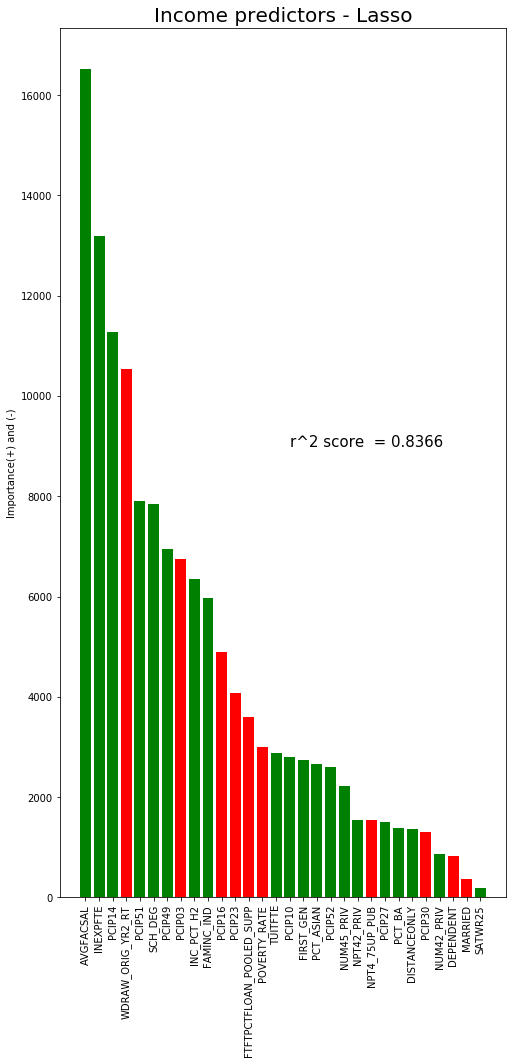

In [180]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors - Lasso")
plt.rc('figure', titlesize=20)
plt.rc('axes', titlesize=30)
ax1.text(15, 9000, 'r^2 score  = %.4f'%(rfe_score) , fontsize=15)
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)
ax1.set_ylabel("Importance(+) and (-)")
plt.show()
fig.savefig(path2 + 'lasso_income_predictor.png', format = 'png' , bbox_inches='tight')

In [139]:
column_headings_template_df

dev-category                               NAME OF DATA ELEMENT  \
0      academics  Bachelor's degree in Agriculture, Agriculture ...   
1      academics  Bachelor's degree in Architecture And Related ...   
2      academics  Bachelor's degree in Area, Ethnic, Cultural, G...   
3      academics  Bachelor's degree in Biological And Biomedical...   
4      academics  Bachelor's degree in Business, Management, Mar...   
..           ...                                                ...   
235      student                      Poverty rate, via Census data   
236      student                        Share of dependent students   
237      student                           Share of female students   
238      student                 Share of first-generation students   
239      student                          Share of married students   

                      developer-friendly name API data type VARIABLE NAME  
0               program.bachelors.agriculture       integer    CIP01BACHL  
1              program.bachelors.architecture       integer    CIP04BACHL  
2    program.bachelors.ethnic_cultural_gender       integer    CIP05BACHL  
3                program.bachelors.biological       integer    CIP26BACHL  
4        program.bachelors.business_marketing       integer    CIP52BACHL  
..                                        ...           ...           ...  
235                 demographics.poverty_rate         float  POVERTY_RATE  
236                    demographics.dependent         float     DEPENDENT  
237                 demographics.female_share         float        FEMALE  
238             demographics.first_generation         float     FIRST_GEN  
239                      demographics.married         float       MARRIED  

[240 rows x 5 columns]

In [140]:
#now lets do the elastic net model

In [141]:
X = X_base_line
y = y_baseline

In [142]:
#not supposed to be here.  Should have been dropped.  All RPY column values
#X['IND_RPY_1YR_RT']


In [143]:
columns = X.columns.to_list()

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [145]:
y_train_nat = y_train

In [146]:
y_train = y_train.ravel().reshape(1,-1)

In [147]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [148]:
y_test = y_test.ravel().reshape(-1, 1)
y_test

array([[32300],
       [78600],
       [29100],
       [38700],
       [21100],
       [37400],
       [52200],
       [35800],
       [39600],
       [44300],
       [40300],
       [34200],
       [32200],
       [45500],
       [16100],
       [32500],
       [51900],
       [37100],
       [32600],
       [52000],
       [24900],
       [42300],
       [34300],
       [25400],
       [29100],
       [37100],
       [37600],
       [38400],
       [31400],
       [44600],
       [33300],
       [54200],
       [37800],
       [38500],
       [43600],
       [38800],
       [41500],
       [34200],
       [46700],
       [64700],
       [26300],
       [38400],
       [30900],
       [37700],
       [32600],
       [42500],
       [31600],
       [43600],
       [48200],
       [32600],
       [37600],
       [38400],
       [38600],
       [28100],
       [52100],
       [40500],
       [65500],
       [22500],
       [36500],
       [42200],
       [42200],
       [56500],
       [

In [149]:
X_train = X_scaler.transform(X_train)
#y_train =  y_scaler.transform(y_train)
X_test =  X_scaler.transform(X_test)
#y_test = y_scaler.transform(y_test)

In [150]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.05,l1_ratio = .4,  max_iter = 10000, tol = .1)

In [151]:
y_test

array([[32300],
       [78600],
       [29100],
       [38700],
       [21100],
       [37400],
       [52200],
       [35800],
       [39600],
       [44300],
       [40300],
       [34200],
       [32200],
       [45500],
       [16100],
       [32500],
       [51900],
       [37100],
       [32600],
       [52000],
       [24900],
       [42300],
       [34300],
       [25400],
       [29100],
       [37100],
       [37600],
       [38400],
       [31400],
       [44600],
       [33300],
       [54200],
       [37800],
       [38500],
       [43600],
       [38800],
       [41500],
       [34200],
       [46700],
       [64700],
       [26300],
       [38400],
       [30900],
       [37700],
       [32600],
       [42500],
       [31600],
       [43600],
       [48200],
       [32600],
       [37600],
       [38400],
       [38600],
       [28100],
       [52100],
       [40500],
       [65500],
       [22500],
       [36500],
       [42200],
       [42200],
       [56500],
       [

In [152]:
elastic_net = model.fit(X_train, y_train.ravel())
elastic_net  = model.score(X_test, y_test)
elastic_net_score = elastic_net
elastic_net

0.6908654666301455

In [153]:
alpha = [0.01, .05, .1, .15, .2, .4, .6, .8, 1]
l1_ratio = [0, .2, .4, .6, .8, 1]
# Maximum number of levels in tree
fit_intercept = [True, False]
normalize = [True, False]
warm_start = [True, False]
selection = ['cyclic', 'random']
random_state = [10]

random_grid = {'alpha': alpha,
               'l1_ratio': l1_ratio,
               'fit_intercept' : fit_intercept,
               'normalize': normalize,
               'warm_start': warm_start,
               'selection': selection,
               'random_state': random_state}
random_grid

{'alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1],
 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
 'fit_intercept': [True, False],
 'normalize': [True, False],
 'warm_start': [True, False],
 'selection': ['cyclic', 'random'],
 'random_state': [10]}

In [154]:
elastic_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [155]:
elastic_random.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   23.0s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [156]:
predicted_y = elastic_random.predict(X_test)

In [157]:
elastic_random.score(X_test, y_test)

0.7875074812459312

In [158]:
elastic_random

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [159]:
elastic_random.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [160]:
model_best =elastic_random.best_estimator_

In [161]:
model_best.fit(X_train, y_train.ravel())


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [162]:
model_best.coef_

array([ 5.91963954e+02, -5.14024721e+02, -2.14837877e+02,  1.24411510e+03,
       -1.62383085e+03, -4.24625875e+02,  6.20281369e+02, -7.52151442e+02,
        1.01223030e+02, -2.19346227e+03,  1.19039001e+03, -8.13588119e+02,
       -5.35937905e+02, -6.46543966e+01, -6.80641038e+02,  1.26054374e+03,
        2.13814014e+03, -1.41913152e+03, -9.78682118e+02,  1.25271612e+02,
       -3.12376858e+02, -1.70853973e+03, -2.16311420e+02,  2.11413207e+03,
        4.17692848e+02,  9.82227983e+01, -1.00873424e+03,  3.05790642e+02,
       -7.58961440e+02,  7.64198568e+02, -5.19923737e+02, -3.78609176e+02,
        2.61565280e+02,  1.62691229e+02, -1.84968151e+02,  1.67503235e+02,
        8.07202525e+02, -1.75375918e+03, -3.37433477e+03, -2.37141069e+03,
        8.25056485e+01, -1.26116116e+03,  6.44648900e+03,  2.60341576e+03,
       -3.09736024e+03,  2.80032604e+03,  4.72187625e+03, -1.86130526e+03,
       -2.51325048e+03,  2.30602128e+03,  1.12694962e+04, -4.08060831e+03,
        4.77900123e+02, -

In [163]:
number_features = 30
rfe = RFE(estimator = model_best, n_features_to_select = number_features,  step=1)

In [164]:
results = rfe.fit(X_test, y_test.ravel())

In [165]:
elasticnet_score = results.score(X_test, y_test)
elasticnet_score

0.8365914368153822

In [166]:
results.ranking_

array([203, 140,  77, 114, 143, 155, 116, 136, 122,  14,  62,  50, 126,
        73, 151,  89,  61,  63, 125,  98, 149,  51, 103,  18,  12,  29,
        23,  17,  53,  59,  60,  74,  15,   8,  24, 109,  93,  46, 163,
       105,  26,  11,  30,   1, 139,   1,  42, 102,  54,  43,   1,   1,
        75,   1,   1,  36,  10,  78, 129, 154,   1,  71, 110,   1,   1,
        58,  76,   6, 120,  20, 118,  21,  55,  22,  92,   1,  39, 115,
       134,   1,  44, 144, 145,  27,  28,  19, 147,  79,  88, 132,  84,
       127,   5,  25, 152,  38,  94,  85, 117,  31,  90, 156,  91,   1,
        68, 107,  41,   9,   1, 131, 191, 193,  87, 197,  96, 201,  72,
       207, 123, 210,  99, 208,  35, 169,   1, 172, 100, 168,  33, 204,
        45, 190, 111, 167, 113, 186,  34, 159,   1, 180,  16, 157, 106,
       162, 171, 128, 141,  32, 188,  47, 170,  65, 183,   4, 185,  49,
       161,   1, 199,  82, 164,   1, 195, 101, 198,  67, 174,   7, 175,
        56, 165,  64,  13, 177, 200, 179, 187, 206, 194, 209, 18

In [167]:
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False,  True,  True, False,  True,
        True, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [168]:
elasticnet_results = {'results_value':results.ranking_, 'results_keep':results.support_, 'VARIABLE NAME': columns, 'coefficient': model_best.coef_}

In [169]:
elasticnet_results_df = pd.DataFrame(data = elasticnet_results)

In [170]:
elasticnet_results_df['abs(coef_)'] = np.abs(elasticnet_results_df['coefficient'])

In [171]:
elasticnet_results_sorted_df = elasticnet_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False)

In [172]:
elasticnet_results_sorted_df

results_value  results_keep      VARIABLE NAME   coefficient  \
186              1          True          AVGFACSAL  16516.893942   
199              1          True           INEXPFTE  13182.780579   
50               1          True             PCIP14  11269.496236   
108              1          True  WDRAW_ORIG_YR2_RT -10528.490345   
76              39         False             PCIP50  -9232.339432   
..             ...           ...                ...           ...   
182            181         False     CIPTFBSANNUAL5      0.000000   
181            184         False           CIPTFBS4      0.000000   
180            182         False     CIPTFBSANNUAL4      0.000000   
179            209         False           CIPTFBS3      0.000000   
119            210         False        NPT45_OTHER      0.000000   

       abs(coef_)  
186  16516.893942  
199  13182.780579  
50   11269.496236  
108  10528.490345  
76    9232.339432  
..            ...  
182      0.000000  
181      0.000000  
180      0.000000  
179      0.000000  
119      0.000000  

[239 rows x 5 columns]

In [173]:
elasticnet_results_sorted_df = elasticnet_results_sorted_df[elasticnet_results_sorted_df['results_keep'].to_numpy()].drop(columns = ['results_value', 'results_keep'])
elasticnet_results_sorted_df['description']=0
elasticnet_results_sorted_df['long_name']=0
for index, row in elasticnet_results_sorted_df.iterrows():
    elasticnet_results_sorted_df.loc[index,'description'] = column_headings_template_df.loc[column_headings_template_df['VARIABLE NAME'] == row['VARIABLE NAME'],'NAME OF DATA ELEMENT'].to_numpy()[0]
    elasticnet_results_sorted_df.loc[index,'long_name'] = column_headings_template_df.loc[column_headings_template_df['VARIABLE NAME'] == row['VARIABLE NAME'],'developer-friendly name'].to_numpy()[0]

In [174]:
elasticnet_results_sorted_df

VARIABLE NAME   coefficient    abs(coef_)  \
186                 AVGFACSAL  16516.893942  16516.893942   
199                  INEXPFTE  13182.780579  13182.780579   
50                     PCIP14  11269.496236  11269.496236   
108         WDRAW_ORIG_YR2_RT -10528.490345  10528.490345   
54                     PCIP51   7900.437099   7900.437099   
204                   SCH_DEG   7843.439964   7843.439964   
75                     PCIP49   6951.314248   6951.314248   
64                     PCIP03  -6754.627659   6754.627659   
208                INC_PCT_H2   6339.328754   6339.328754   
213                FAMINC_IND   5976.656505   5976.656505   
53                     PCIP16  -4885.597936   4885.597936   
51                     PCIP23  -4080.608314   4080.608314   
103  FTFTPCTFLOAN_POOLED_SUPP  -3595.538216   3595.538216   
234              POVERTY_RATE  -2998.814608   2998.814608   
202                   TUITFTE   2881.735688   2881.735688   
45                     PCIP10   2800.326045   2800.326045   
237                 FIRST_GEN   2739.972656   2739.972656   
227                 PCT_ASIAN   2653.644686   2653.644686   
43                     PCIP52   2603.415762   2603.415762   
157                NUM45_PRIV   2229.568304   2229.568304   
124                NPT42_PRIV   1550.717788   1550.717788   
138             NPT4_75UP_PUB  -1543.383373   1543.383373   
60                     PCIP27   1507.133698   1507.133698   
232                    PCT_BA   1374.947690   1374.947690   
195              DISTANCEONLY   1355.105414   1355.105414   
63                     PCIP30  -1307.889659   1307.889659   
161                NUM42_PRIV    873.724647    873.724647   
235                 DEPENDENT   -816.381617    816.381617   
238                   MARRIED   -358.568676    358.568676   
79                    SATWR25    188.367357    188.367357   

                                           description  \
186                             Average faculty salary   
199  Instructional expenditures per full-time equiv...   
50       Percentage of degrees awarded in Engineering.   
108  Percent withdrawn from original institution wi...   
54   Percentage of degrees awarded in Health Profes...   
204     Predominant degree awarded (recoded 0s and 4s)   
75   Percentage of degrees awarded in Transportatio...   
64   Percentage of degrees awarded in Natural Resou...   
208  Aided students with family incomes between $11...   
213  Average family income for independent students...   
53   Percentage of degrees awarded in Foreign Langu...   
51   Percentage of degrees awarded in English Langu...   
103  Percentage of full-time, first-time degree/cer...   
234                      Poverty rate, via Census data   
202  Net tuition revenue per full-time equivalent s...   
45   Percentage of degrees awarded in Communication...   
237                 Share of first-generation students   
227  Percent of the population from students' zip c...   
43   Percentage of degrees awarded in Business, Man...   
157  Number of Title IV students, $110,000+ family ...   
124  Average net price for $30,001-$48,000 family i...   
138  Average net price for $75,000+ family income (...   
60   Percentage of degrees awarded in Mathematics A...   
232  Percent of the population from students' zip c...   
195         Flag for distance-education-only education   
63   Percentage of degrees awarded in Multi/Interdi...   
161  Number of Title IV students, $30,001-$48,000 f...   
235                        Share of dependent students   
238                          Share of married students   
79   25th percentile of SAT scores at the instituti...   

                                             long_name  
186                                     faculty_salary  
199                  instructional_expenditure_per_fte  
50                      program_percentage.engineering  
108                         title_iv.withdrawn_by.2yrs  
54                           program_per

In [175]:
elasticnet_results_sorted_df.to_csv(path2 + 'elasticnet_results_sorted_earnings_df.csv')

In [176]:
mask = elasticnet_results_sorted_df['coefficient'] > 0

In [177]:
x = elasticnet_results_sorted_df['VARIABLE NAME']
y = elasticnet_results_sorted_df['abs(coef_)']

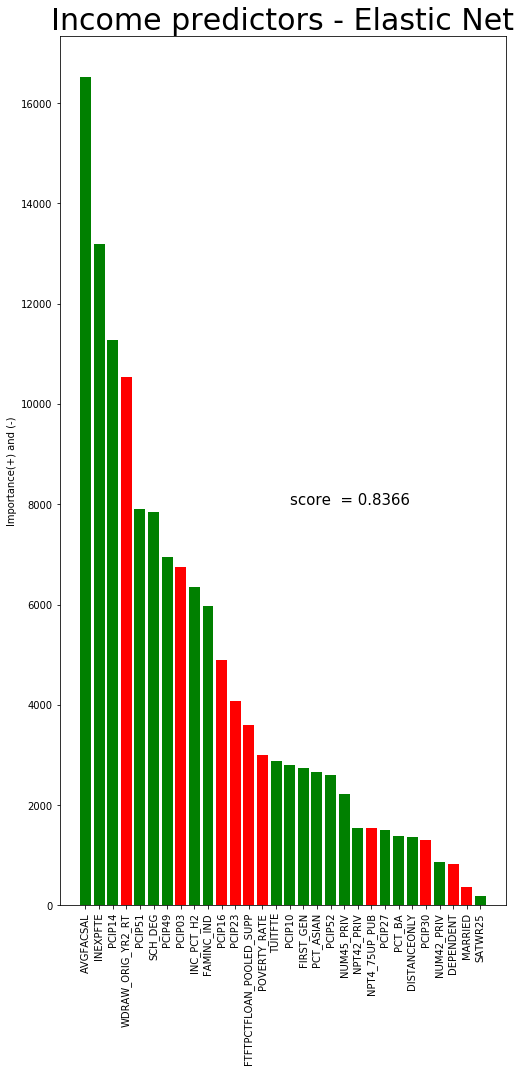

In [178]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors - Elastic Net")
plt.rc('figure', titlesize=30)
plt.rc('axes', titlesize=20)
ax1.text(15, 8000, 'score  = %.4f'%(elasticnet_score) , fontsize=15)
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)
ax1.set_ylabel("Importance(+) and (-)")
plt.show()
fig.savefig(path2 + 'elastic_net_income_predictor.png', format = 'png' , bbox_inches='tight')